In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fraudTest.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
df.shape

(555719, 23)

In [5]:
# so its 23 cols (features) and 555719 rows


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# no null values present


In [10]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
# Dropping Unnecessary columns

In [12]:
cols_to_drop = ['Unnamed: 0', 'trans_num', 'first', 'last','merchant','street','city','zip','merch_long','unix_time','job','merch_lat']
df.drop(columns=cols_to_drop, inplace=True)


In [13]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,0


In [14]:
# analyses of is fraud

In [15]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [16]:
df['is_fraud'].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [17]:
df['is_fraud'].value_counts(normalize=True) * 100


is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

# From the value counts, it is clear that the dataset is highly imbalanced:
# - Class 1 is approx 0.38%
# - Class 0 is approx 99.62%


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3372493068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_fraud'], data=df, palette='Set2')


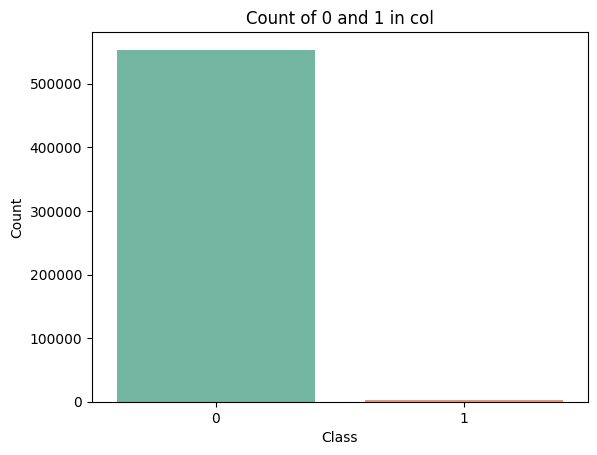

In [18]:
sns.countplot(x=df['is_fraud'], data=df, palette='Set2')

# Add labels
plt.title("Count of 0 and 1 in col")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
# gender columns analysis

In [20]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [21]:
df['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

In [22]:
df['gender'].value_counts(normalize=True) * 100

gender
F    54.863339
M    45.136661
Name: proportion, dtype: float64

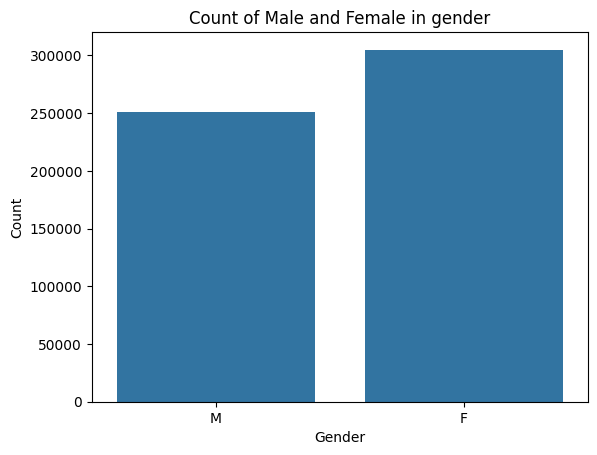

In [23]:
sns.countplot(x=df['gender'], data=df)

# Add labels
plt.title("Count of Male and Female in gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [24]:
# so male = 45.13% and female = 54.86%

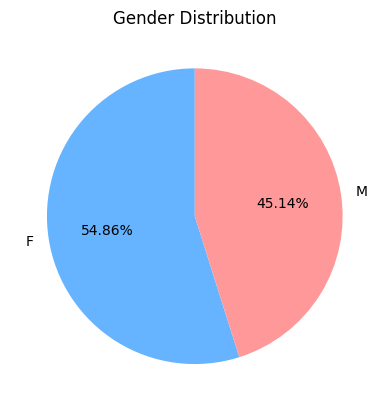

In [25]:
df['gender'].value_counts().plot.pie(autopct='%1.2f%%', colors=['#66b3ff','#ff9999'], startangle=90)

plt.title("Gender Distribution")
plt.ylabel("")  # remove y-label
plt.show()

In [26]:
# Gender V/s Fruad

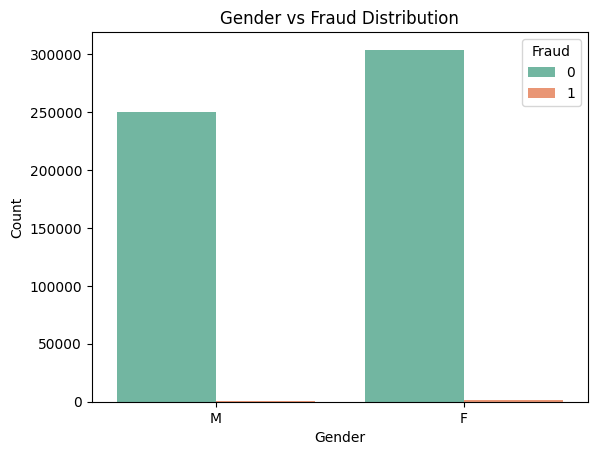

In [27]:
sns.countplot(x='gender', hue='is_fraud', data=df, palette='Set2')

plt.title("Gender vs Fraud Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Fraud')
plt.show()

In [28]:
# from above analysis we can say that gender col is independent of fraud 
# it means that either gender is male or female it doesnt matter fruad is happening from both of them and they are less in quantity
# but it can be used in modelling

In [29]:
df.shape

(555719, 11)

In [30]:
df.columns


Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'state',
       'lat', 'long', 'city_pop', 'dob', 'is_fraud'],
      dtype='object')

In [31]:
# dob analysis - make a new column age from dob column

In [32]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


In [33]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,0


In [34]:
import datetime as dt

today = dt.datetime.today()
df['age'] = (today - df['dob']).dt.days // 365


In [35]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,dob,is_fraud,age
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,0,57
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,0,35
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,0,54
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,0,38
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,0,59
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,0,25
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,0,43
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,0,59


In [36]:
print(df['age'].describe())


count    555719.000000
mean         51.396431
std          17.450659
min          20.000000
25%          38.000000
50%          49.000000
75%          63.000000
max         100.000000
Name: age, dtype: float64


In [37]:
# Distribution of Age column

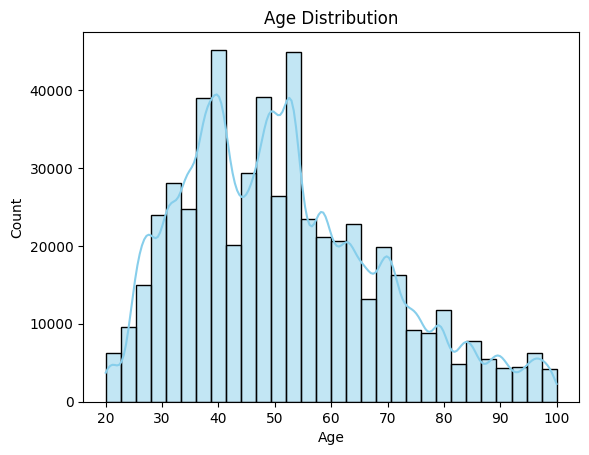

In [38]:
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\2723889655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='age', data=df, palette='Set2')


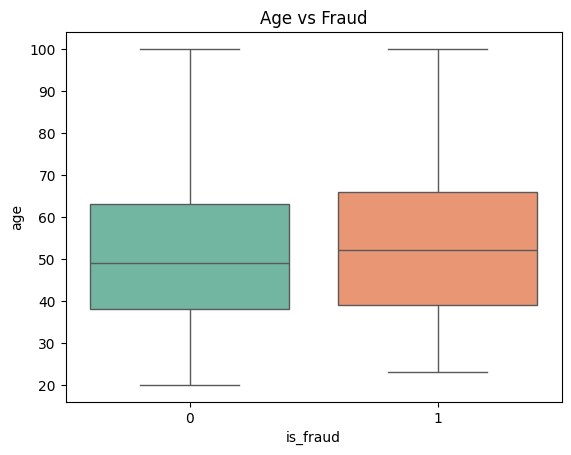

In [39]:
sns.boxplot(x='is_fraud', y='age', data=df, palette='Set2')
plt.title("Age vs Fraud")
plt.show()

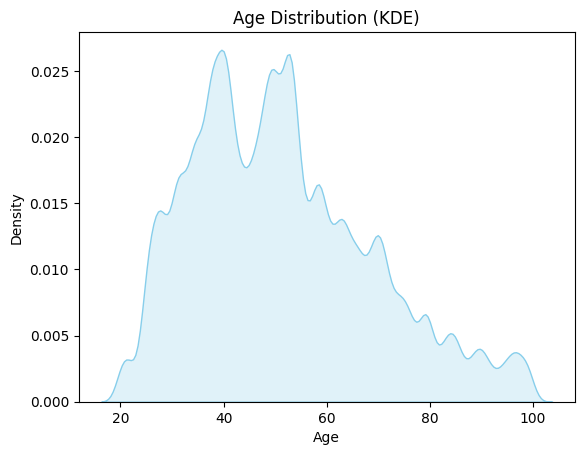

In [40]:
sns.kdeplot(df['age'], fill=True, color="skyblue")
plt.title("Age Distribution (KDE)")
plt.xlabel("Age")
plt.show()


In [41]:
# age distirbution lies between 20 to 100. its a bimodal plot

In [42]:
df.drop(columns=['dob'], inplace=True)

In [43]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0,57
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,0,35
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0,54
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,0,38
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,0,70
...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,0,59
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,0,25
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,0,43
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,0,59


In [44]:
# Define bins and labels
# Converting age column into a categorical column
bins = [0, 18, 30, 45, 60, 75, 110]  
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']

# Convert continuous age into age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [45]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age,age_group
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0,57,46-60
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,0,35,31-45
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0,54,46-60
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,0,38,31-45
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,0,70,61-75
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,0,59,46-60
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,0,25,19-30
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,0,43,31-45
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,0,59,46-60


In [46]:
print(df['age_group'].value_counts())

age_group
46-60    175303
31-45    174268
61-75     97525
76+       62298
19-30     46325
0-18          0
Name: count, dtype: int64


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\876077764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = df.groupby('age_group')['is_fraud'].mean() * 100
C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\876077764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_fraud.index, y=age_fraud.values, palette="Blues")


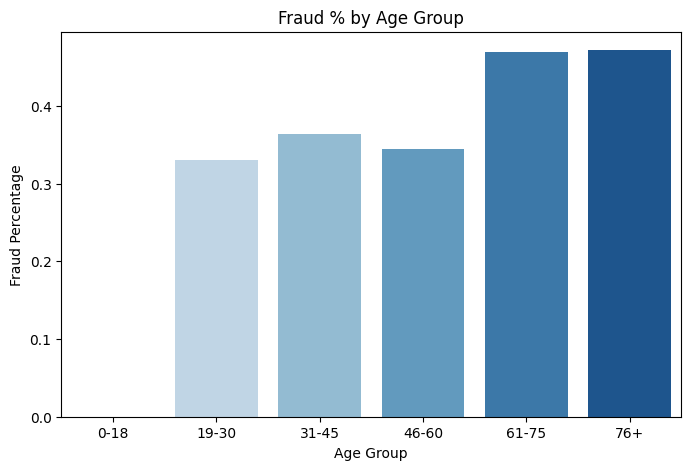

In [47]:
# Fraud percentage by age group
age_fraud = df.groupby('age_group')['is_fraud'].mean() * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=age_fraud.index, y=age_fraud.values, palette="Blues")
plt.title("Fraud % by Age Group")
plt.ylabel("Fraud Percentage")
plt.xlabel("Age Group")
plt.show()


In [48]:
df.dtypes

trans_date_trans_time      object
cc_num                      int64
category                   object
amt                       float64
gender                     object
state                      object
lat                       float64
long                      float64
city_pop                    int64
is_fraud                    int64
age                         int64
age_group                category
dtype: object

In [49]:
# Analysing Category cols

In [50]:
df['category'].nunique()

14

In [51]:
df['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [52]:
# doing bivariate analysis of category and is_fruad

In [53]:
# Crosstab between category and is_fraud
ct = pd.crosstab(df['category'], df['is_fraud'])
print(ct)

# Normalized version (row-wise percentages)
ct_norm = pd.crosstab(df['category'], df['is_fraud'], normalize='index') * 100
print("\nFraud % distribution by category:\n", ct_norm)


is_fraud            0    1
category                  
entertainment   40045   59
food_dining     39214   54
gas_transport   56216  154
grocery_net     19385   41
grocery_pos     52068  485
health_fitness  36622   52
home            52278   67
kids_pets       48627   65
misc_net        27100  267
misc_pos        34502   72
personal_care   39257   70
shopping_net    41273  506
shopping_pos    49578  213
travel          17409   40

Fraud % distribution by category:
 is_fraud                0         1
category                           
entertainment   99.852883  0.147117
food_dining     99.862483  0.137517
gas_transport   99.726805  0.273195
grocery_net     99.788943  0.211057
grocery_pos     99.077122  0.922878
health_fitness  99.858210  0.141790
home            99.872003  0.127997
kids_pets       99.866508  0.133492
misc_net        99.024372  0.975628
misc_pos        99.791751  0.208249
personal_care   99.822005  0.177995
shopping_net    98.788865  1.211135
shopping_pos    99.572212  0

In [54]:
# there might be a case that under category section that gas_transport,grocery_pos,misc_net,shopping_net,shoping_pos are vulnerable to fraud

In [55]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

if p < 0.05:
    print("✅ Significant relationship between category and fraud")
else:
    print("❌ No significant relationship")


Chi2 = 1852.24, p-value = 0.0000
✅ Significant relationship between category and fraud


In [56]:
# and chi- square test proves that there is a relationship between category and fraud col

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3164954048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ct_norm.index, y=ct_norm[1], palette="Reds")  # 1 = Fraud


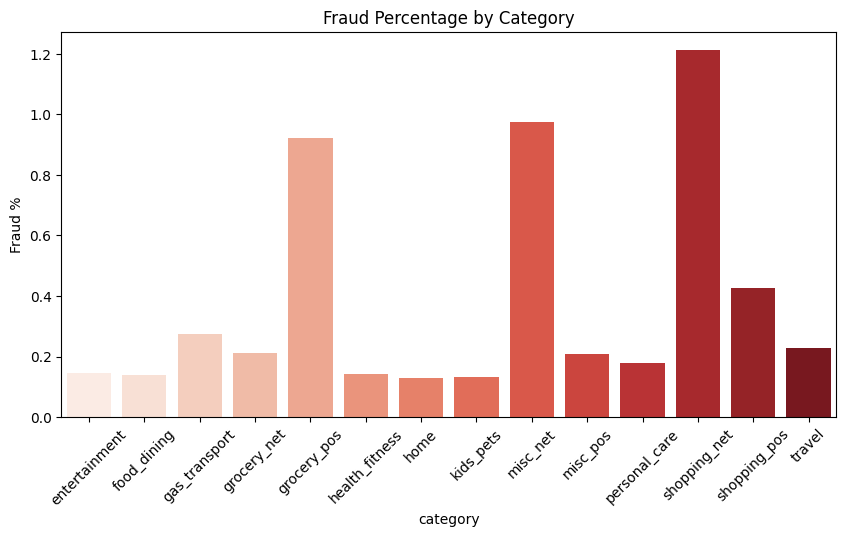

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=ct_norm.index, y=ct_norm[1], palette="Reds")  # 1 = Fraud
plt.title("Fraud Percentage by Category")
plt.ylabel("Fraud %")
plt.xticks(rotation=45)
plt.show()


In [58]:
# above grapgh proves my logic

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for categorical-categorical association.
    x, y = categorical columns (pandas Series)
    """
    ct = pd.crosstab(x, y)           # Contingency table
    chi2, p, dof, expected = chi2_contingency(ct)
    n = ct.sum().sum()                # Total number of observations
    return np.sqrt(chi2 / (n * (min(ct.shape)-1)))

# Example for category vs is_fraud
cramers_v_value = cramers_v(df['category'], df['is_fraud'])
print(f"Cramér's V between category and is_fraud: {cramers_v_value:.3f}")


Cramér's V between category and is_fraud: 0.058


In [60]:
# but association with category and is_fruad is very less

In [61]:
# so category can be merged or binning to make it use in modelling as it capture certain data

In [62]:

#State v/s fraud analysis

In [63]:
df['state'].value_counts()

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64

In [64]:
# Top 20 State wise total transaction counts and fraud transaction counts

   state  total_txn  fraud_txn  fraud_rate
33    NY      35918        175    0.487221
37    PA      34326        114    0.332110
42    TX      40393        113    0.279751
13    IL      18960         76    0.400844
4     CA      24135         76    0.314895
14    IN      11959         75    0.627143
44    VA      12506         75    0.599712
22    MN      13719         73    0.532109
23    MO      16501         71    0.430277
11    IA      11819         69    0.583806
16    KY      12506         67    0.535743
47    WI      12370         65    0.525465
1     AL      17532         63    0.359343
21    MI      19671         61    0.310101
9     GA      11277         58    0.514321
35    OK      11379         57    0.500923
24    MS       8833         54    0.611344
8     FL      18104         53    0.292753
36    OR       7811         48    0.614518
26    NC      12868         46    0.357476


<Figure size 1200x600 with 0 Axes>

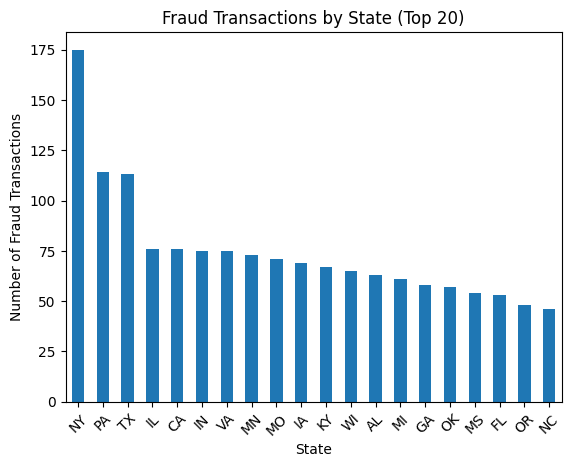

<Figure size 1200x600 with 0 Axes>

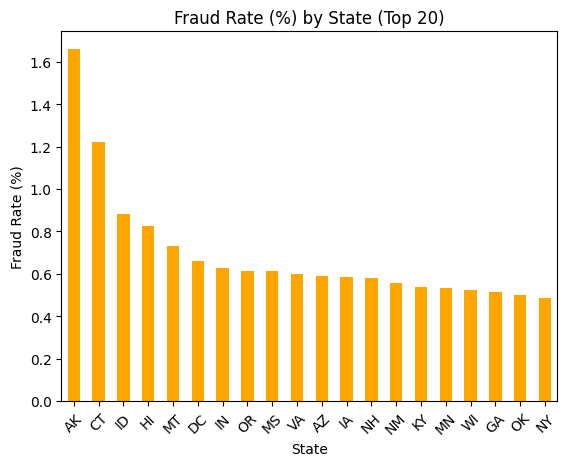

In [65]:
# Group by state: total transactions and fraud transactions
state_fraud_stats = df.groupby('state')['is_fraud'].agg(
    total_txn='count',
    fraud_txn='sum'
).reset_index()

# Fraud percentage
state_fraud_stats['fraud_rate'] = (state_fraud_stats['fraud_txn'] / state_fraud_stats['total_txn']) * 100

# Sort by fraud count (descending)
state_fraud_stats = state_fraud_stats.sort_values(by='fraud_txn', ascending=False)

print(state_fraud_stats.head(20))  # top 10 states with highest frauds

# ---------------- PLOTS ----------------

# 1️⃣ Fraud transactions by state (Top 20)
plt.figure(figsize=(12,6))
state_fraud_stats.head(20).plot(
    x='state',
    y='fraud_txn',
    kind='bar',
    legend=False
)
plt.title("Fraud Transactions by State (Top 20)")
plt.ylabel("Number of Fraud Transactions")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Fraud rate (%) by state (Top 20)
plt.figure(figsize=(12,6))
state_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(20).plot(
    x='state',
    y='fraud_rate',
    kind='bar',
    color='orange',
    legend=False
)
plt.title("Fraud Rate (%) by State (Top 20)")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

In [66]:
##

In [67]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age,age_group
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0,57,46-60
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,0,35,31-45
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0,54,46-60
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,0,38,31-45
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,0,70,61-75
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,0,59,46-60
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,0,25,19-30
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,0,43,31-45
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,0,59,46-60


In [68]:
# Here trying to find info from trand_date_time --> quarter wise fraud analysis

In [69]:
# Ensure datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Step 1: Extract month (optional, for readability)
df['month'] = df['trans_date_trans_time'].dt.month_name()

# Step 2: Map month → quarter
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}

df['quarter'] = df['month'].map(month_to_quarter)

print(df[['trans_date_trans_time', 'month', 'quarter']].head())

  trans_date_trans_time month quarter
0   2020-06-21 12:14:25  June      Q2
1   2020-06-21 12:14:33  June      Q2
2   2020-06-21 12:14:53  June      Q2
3   2020-06-21 12:15:15  June      Q2
4   2020-06-21 12:15:17  June      Q2


In [70]:
df

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age,age_group,month,quarter
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0,57,46-60,June,Q2
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,40.3207,-110.4360,302,0,35,31-45,June,Q2
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0,54,46-60,June,Q2
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,0,38,31-45,June,Q2
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,44.2529,-85.0170,1126,0,70,61-75,June,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,0,59,46-60,December,Q4
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,0,25,19-30,December,Q4
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,0,43,31-45,December,Q4
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,0,59,46-60,December,Q4


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\2644855361.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='is_fraud', data=fraud_by_quarter, palette='coolwarm')


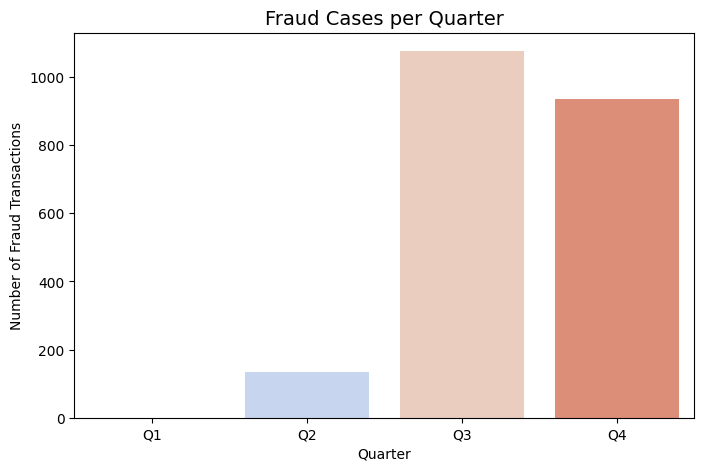

In [71]:

# Group by quarter and sum fraud cases
fraud_by_quarter = df.groupby('quarter')['is_fraud'].sum().reset_index()

# Sort quarters in order
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
fraud_by_quarter['quarter'] = pd.Categorical(fraud_by_quarter['quarter'], categories=quarter_order, ordered=True)
fraud_by_quarter = fraud_by_quarter.sort_values('quarter')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='quarter', y='is_fraud', data=fraud_by_quarter, palette='coolwarm')

plt.title("Fraud Cases per Quarter", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Number of Fraud Transactions")
plt.show()

In [72]:
# since our data set contains data of majority of 3rd and 4th quarter --> hence they have almost equal counts of fraud

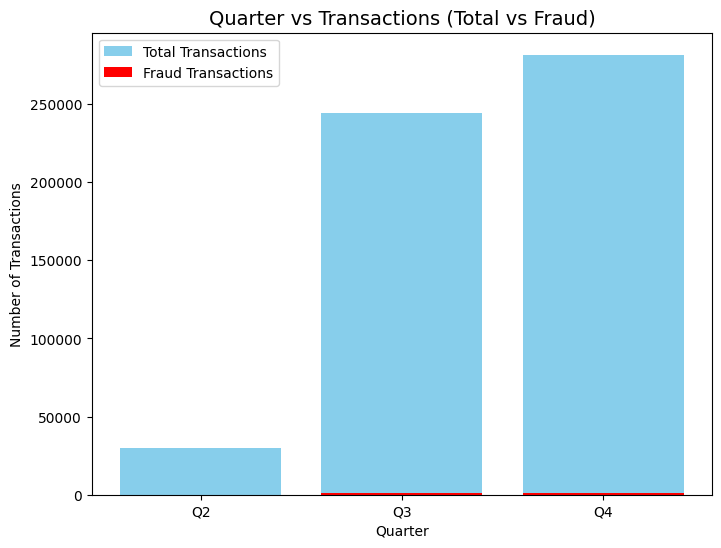

In [73]:
# Count total transactions and frauds per quarter
quarter_stats = df.groupby('quarter').agg(
    total_transactions=('is_fraud', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Ensure correct quarter order
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_stats['quarter'] = pd.Categorical(quarter_stats['quarter'], categories=quarter_order, ordered=True)
quarter_stats = quarter_stats.sort_values('quarter')

# Plot stacked bar chart
plt.figure(figsize=(8,6))

plt.bar(quarter_stats['quarter'], quarter_stats['total_transactions'], label='Total Transactions', color='skyblue')
plt.bar(quarter_stats['quarter'], quarter_stats['fraud_transactions'], label='Fraud Transactions', color='red')

plt.title("Quarter vs Transactions (Total vs Fraud)", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

In [74]:
df.drop(columns=['trans_date_trans_time','age'],inplace=True)

In [75]:
# Analysis on city population

In [76]:
pd.set_option('display.float_format', '{:,.0f}'.format)  

# Now describe again
print(df['city_pop'].describe())


count     555,719
mean       88,222
std       300,391
min            23
25%           741
50%         2,408
75%        19,685
max     2,906,700
Name: city_pop, dtype: float64


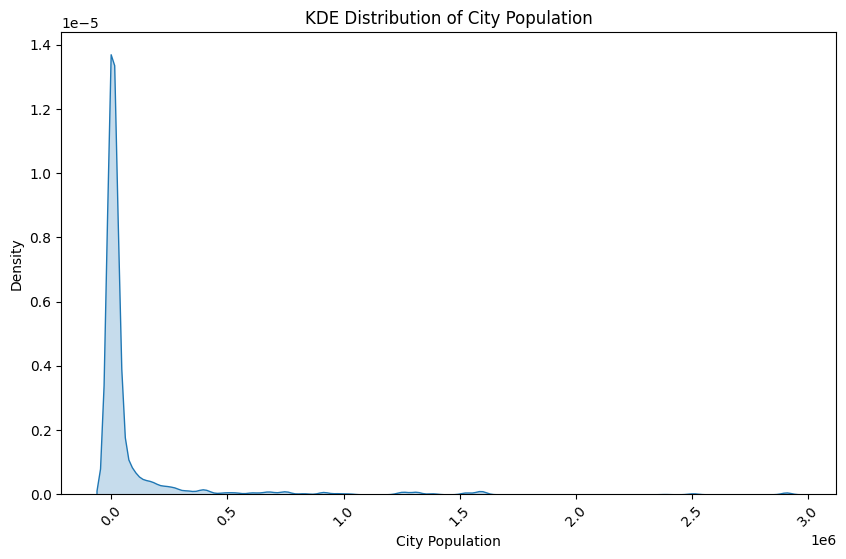

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10,6))
sns.kdeplot(df['city_pop'], fill=True)

plt.title('KDE Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Density')

# Format x-axis to show full numbers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.xticks(rotation=45)

plt.show()



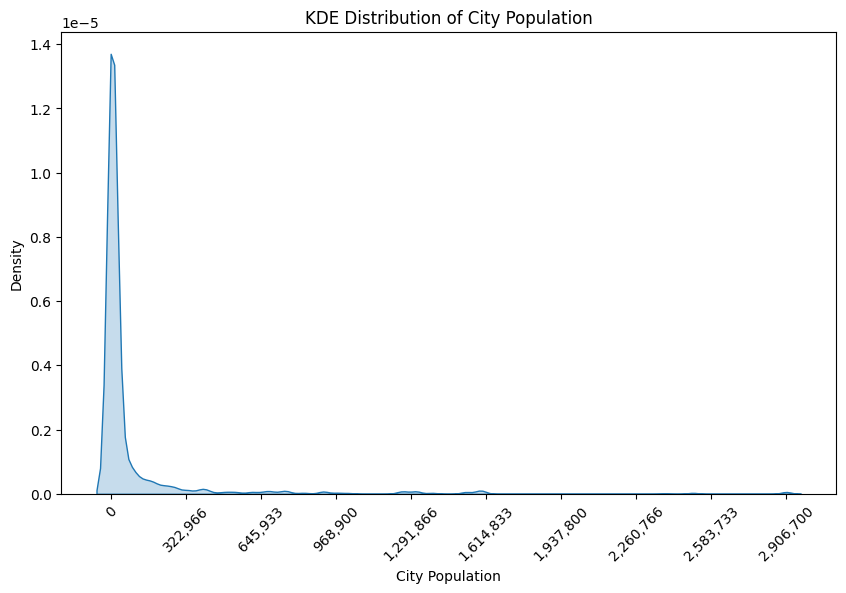

In [78]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['city_pop'], fill=True)

plt.title('KDE Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Density')

# Manually set x-axis ticks
max_pop = df['city_pop'].max()
ticks = np.linspace(0, max_pop, 10)  # 10 ticks from 0 to max
plt.xticks(ticks, [f"{int(t):,}" for t in ticks], rotation=45)

plt.show()

In [79]:
# from kde plot of city population --> it is clear that alrge no of city has a very population and very few of city has large population

In [80]:
df

,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age_group,month,quarter
0,2291163933867244,personal_care,3,M,SC,34,-81,333497,0,46-60,June,Q2
1,3573030041201292,personal_care,30,F,UT,40,-110,302,0,31-45,June,Q2
2,3598215285024754,health_fitness,41,F,NY,41,-74,34496,0,46-60,June,Q2
3,3591919803438423,misc_pos,60,M,FL,29,-81,54767,0,31-45,June,Q2
4,3526826139003047,travel,3,M,MI,44,-85,1126,0,61-75,June,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,519,0,46-60,December,Q4
555715,3556613125071656,kids_pets,112,M,TX,29,-95,28739,0,19-30,December,Q4
555716,6011724471098086,kids_pets,87,F,WA,46,-119,3684,0,31-45,December,Q4
555717,4079773899158,travel,8,M,ID,45,-116,129,0,46-60,December,Q4


In [81]:
# city binning

In [82]:


# Define bins and labels
bins = [0, 25000, 50000, 100000, 200000, df['city_pop'].max()+1]  # +1 to include max
labels = ['Micro Town', 'Small Town', 'Mid City', 'Large City', 'Metro City']

# Create new column
df['city_category'] = pd.cut(df['city_pop'], bins=bins, labels=labels, right=False)

# Check distribution
print(df['city_category'].value_counts())


city_category
Micro Town    426735
Metro City     51415
Mid City       27601
Small Town     25467
Large City     24501
Name: count, dtype: int64


In [83]:
city_fraud = df.groupby('city_category')['is_fraud'].agg(
    total_txn='count',
    fraud_txn='sum'
).reset_index()

city_fraud['fraud_rate'] = (city_fraud['fraud_txn'] / city_fraud['total_txn']) * 100

print(city_fraud)


  city_category  total_txn  fraud_txn  fraud_rate
0    Micro Town     426735       1757           0
1    Small Town      25467         44           0
2      Mid City      27601        136           0
3    Large City      24501         46           0
4    Metro City      51415        162           0


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3960502369.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_fraud = df.groupby('city_category')['is_fraud'].agg(


In [84]:
# so we see that major fruad transaction in Mircro town followed by metro , Mid city ,large city , small town

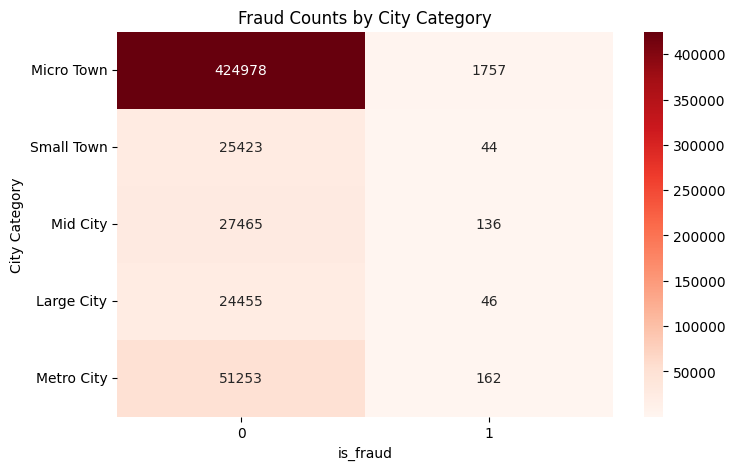

In [85]:
# Create a contingency table (city_category vs is_fraud)
ct = pd.crosstab(df['city_category'], df['is_fraud'])

# Optional: calculate fraud percentage
ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100  # percentage per row

# Plot heatmap of counts
plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt='d', cmap='Reds')
plt.title('Fraud Counts by City Category')
plt.xlabel('is_fraud')
plt.ylabel('City Category')
plt.show()

In [86]:
# above heatmap shows that that micro, mid and metro city contributes more to fraud

In [87]:
# below graph doesnt hold more info

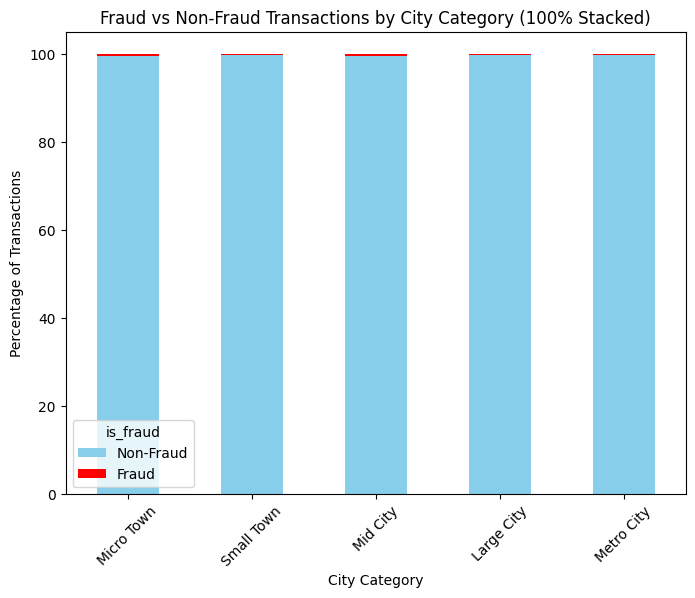

In [88]:
# Convert counts to percentage for 100% stacked bar
ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot
ct_percentage.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue','red'])

plt.title('Fraud vs Non-Fraud Transactions by City Category (100% Stacked)')
plt.ylabel('Percentage of Transactions')
plt.xlabel('City Category')
plt.legend(title='is_fraud', labels=['Non-Fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

In [89]:
# this shows that micro town prones more to fruad transactions

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\1501611780.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df[df['is_fraud']==1].groupby('city_category')['is_fraud'].sum().reset_index()
C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\1501611780.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_category', y='is_fraud', data=fraud_counts, palette='Reds')


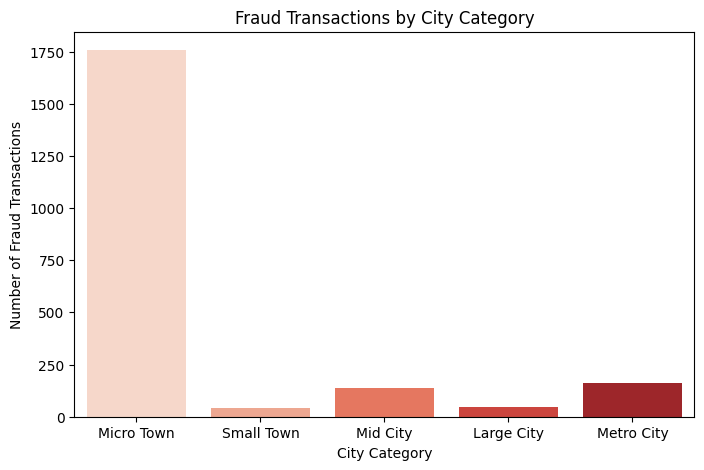

In [90]:

# Group by city_category and sum only fraud transactions
fraud_counts = df[df['is_fraud']==1].groupby('city_category')['is_fraud'].sum().reset_index()

# Sort categories (optional)
category_order = ['Micro Town', 'Small Town', 'Mid City', 'Large City', 'Metro City']
fraud_counts['city_category'] = pd.Categorical(fraud_counts['city_category'], categories=category_order, ordered=True)
fraud_counts = fraud_counts.sort_values('city_category')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='city_category', y='is_fraud', data=fraud_counts, palette='Reds')

plt.title('Fraud Transactions by City Category')
plt.xlabel('City Category')
plt.ylabel('Number of Fraud Transactions')
plt.show()

In [91]:
df

,cc_num,category,amt,gender,state,lat,long,city_pop,is_fraud,age_group,month,quarter,city_category
0,2291163933867244,personal_care,3,M,SC,34,-81,333497,0,46-60,June,Q2,Metro City
1,3573030041201292,personal_care,30,F,UT,40,-110,302,0,31-45,June,Q2,Micro Town
2,3598215285024754,health_fitness,41,F,NY,41,-74,34496,0,46-60,June,Q2,Small Town
3,3591919803438423,misc_pos,60,M,FL,29,-81,54767,0,31-45,June,Q2,Mid City
4,3526826139003047,travel,3,M,MI,44,-85,1126,0,61-75,June,Q2,Micro Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,519,0,46-60,December,Q4,Micro Town
555715,3556613125071656,kids_pets,112,M,TX,29,-95,28739,0,19-30,December,Q4,Small Town
555716,6011724471098086,kids_pets,87,F,WA,46,-119,3684,0,31-45,December,Q4,Micro Town
555717,4079773899158,travel,8,M,ID,45,-116,129,0,46-60,December,Q4,Micro Town


In [92]:
df.drop(columns=['city_pop','month'], axis=1, inplace=True)


In [93]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,quarter,city_category
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Q2,Metro City
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Q2,Micro Town
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Q2,Small Town
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Q2,Mid City
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Q2,Micro Town
...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Q4,Micro Town
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Q4,Small Town
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Q4,Micro Town
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Q4,Micro Town


In [94]:
# category columns

In [95]:
df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [96]:
df['category'].nunique()

14

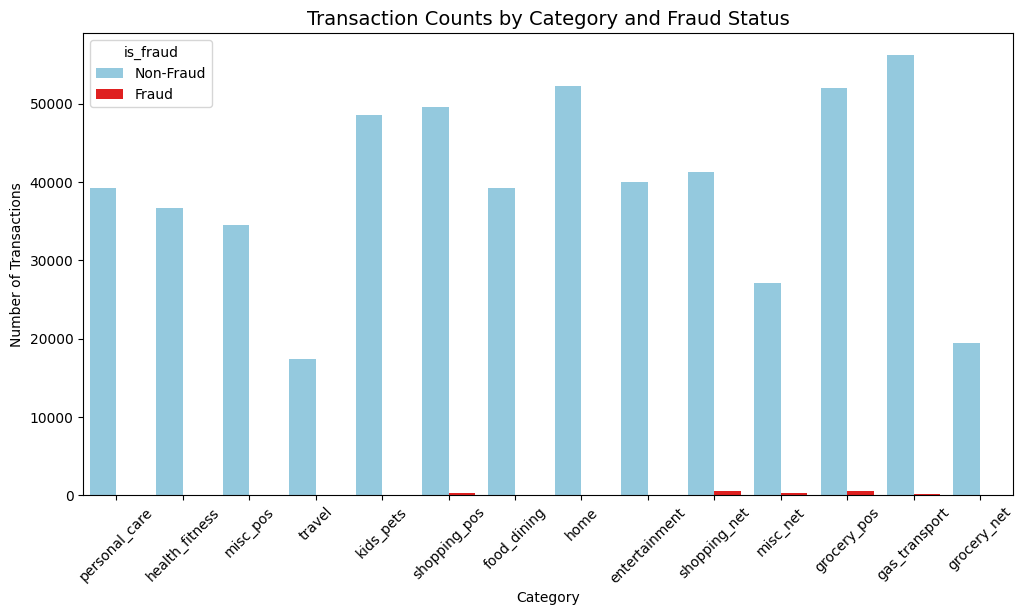

In [97]:
plt.figure(figsize=(12,6))

# Count plot with hue for fraud
sns.countplot(x='category', hue='is_fraud', data=df, palette=['skyblue','red'])

plt.title('Transaction Counts by Category and Fraud Status', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='is_fraud', labels=['Non-Fraud','Fraud'])
plt.show()

In [98]:
# Category wise fraud analysis

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3568631798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds')


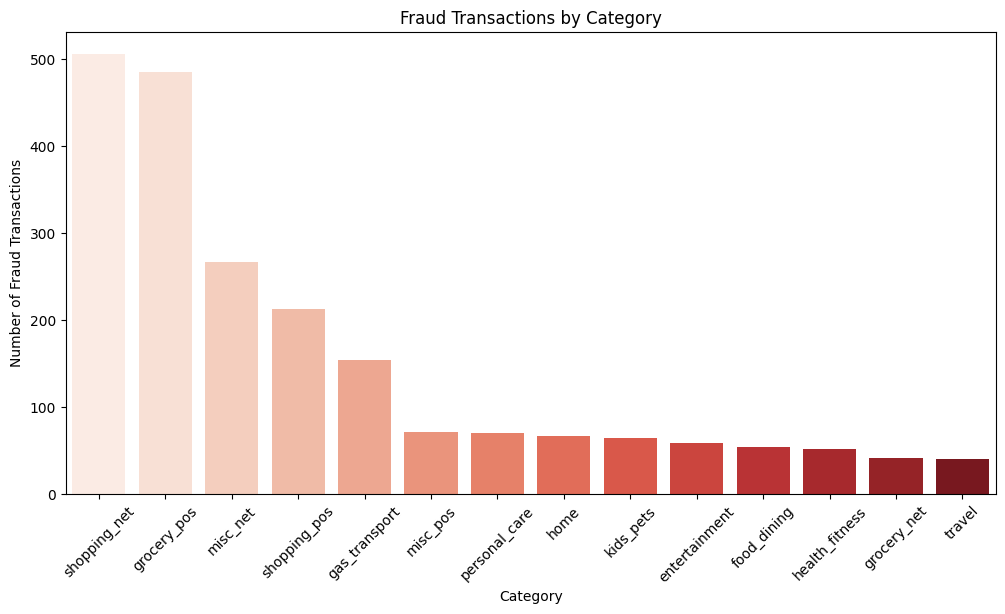

In [99]:
# Filter only fraud transactions
fraud_df = df[df['is_fraud'] == 1]

# Count fraud transactions per category
fraud_counts = fraud_df['category'].value_counts().reset_index()
fraud_counts.columns = ['category', 'fraud_count']

# Optional: sort categories by fraud count
fraud_counts = fraud_counts.sort_values('fraud_count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds')

plt.title('Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()

In [100]:
# category wise total transaction counts and fruad transaction counts

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\2619588555.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds', ax=axes[0])
C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\2619588555.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_count', data=total_counts, palette='Blues', ax=axes[1])


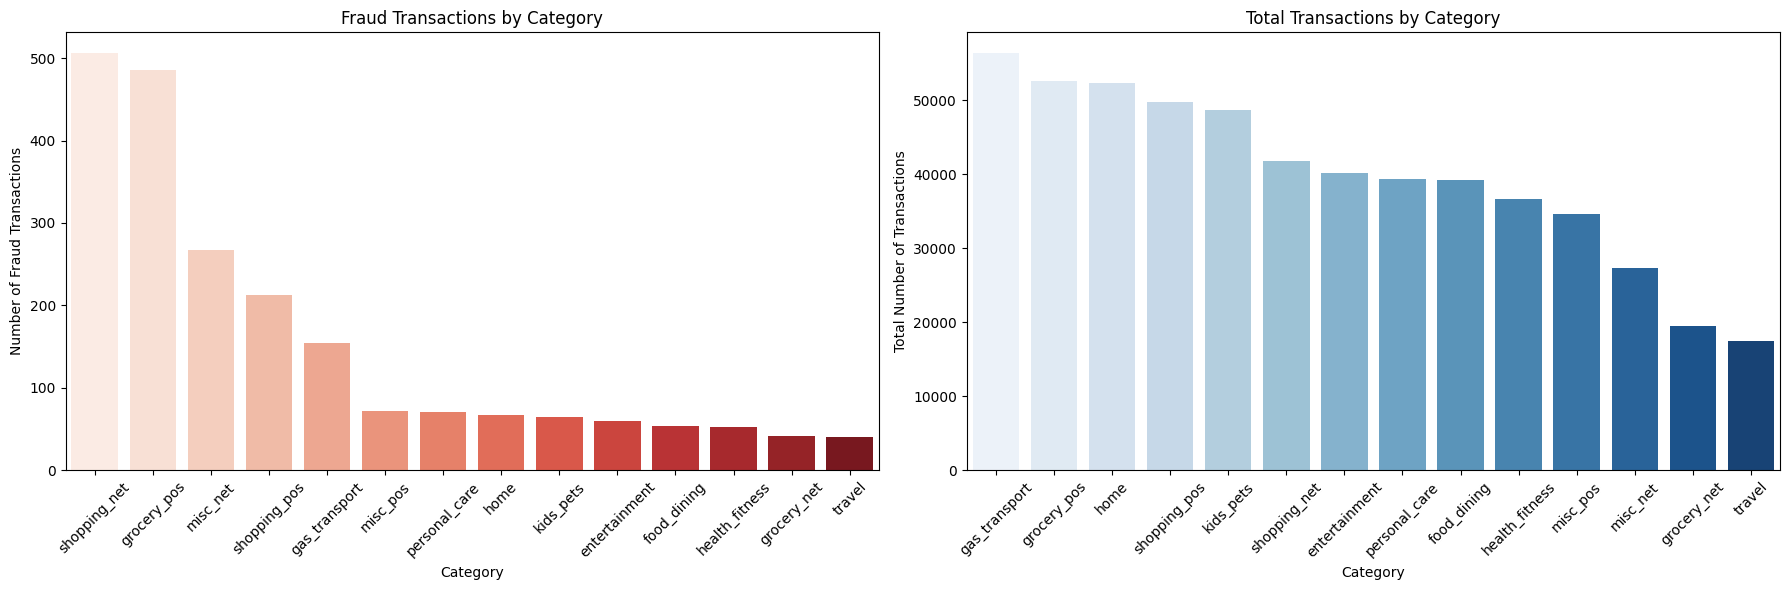

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count fraud transactions per category
fraud_df = df[df['is_fraud'] == 1]
fraud_counts = fraud_df['category'].value_counts().reset_index()
fraud_counts.columns = ['category', 'fraud_count']
fraud_counts = fraud_counts.sort_values('fraud_count', ascending=False)

# Count total transactions per category
total_counts = df['category'].value_counts().reset_index()
total_counts.columns = ['category', 'total_count']
total_counts = total_counts.sort_values('total_count', ascending=False)

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Chart 1: Fraud transactions
sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds', ax=axes[0])
axes[0].set_title('Fraud Transactions by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Fraud Transactions')
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: Total transactions
sns.barplot(x='category', y='total_count', data=total_counts, palette='Blues', ax=axes[1])
axes[1].set_title('Total Transactions by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3814411255.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds', ax=axes[0])
C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3814411255.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_count', data=total_counts, palette='Blues', ax=axes[1])


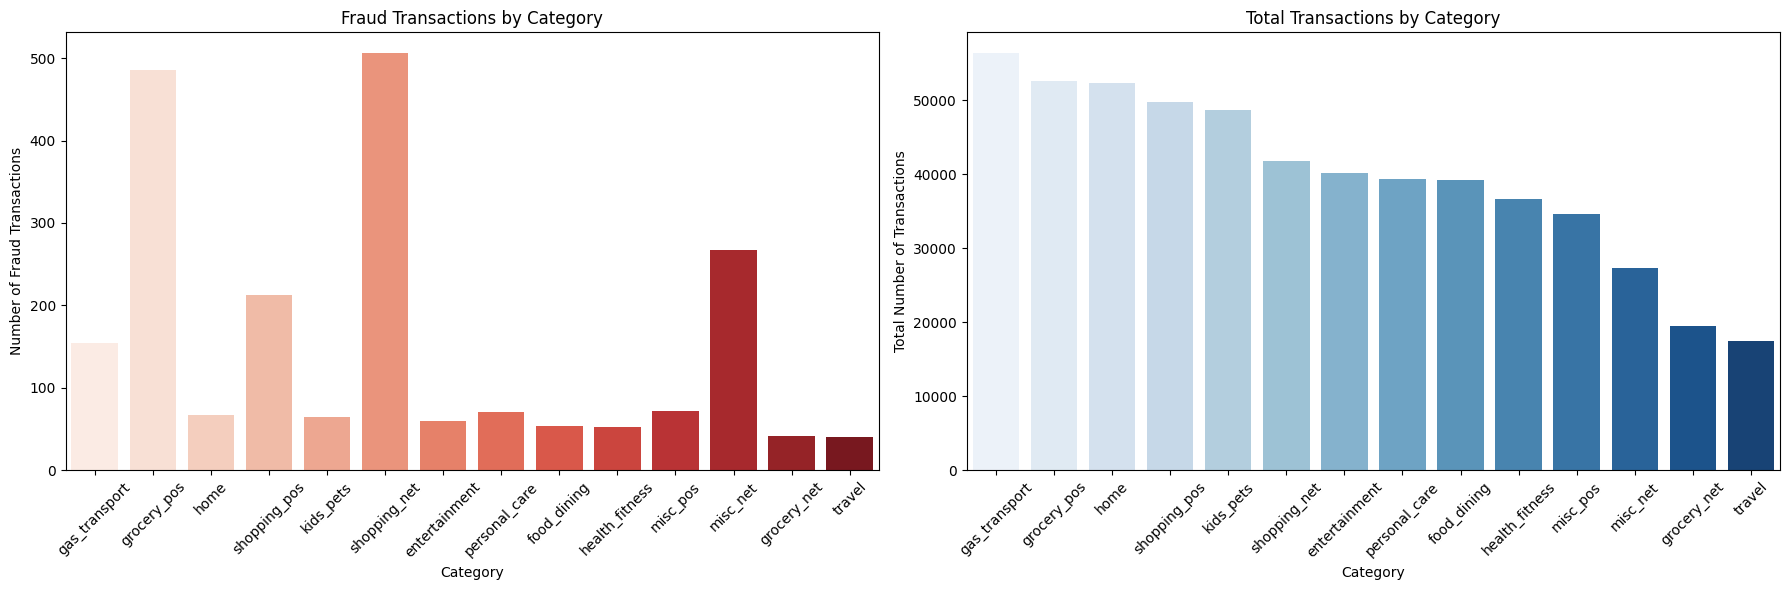

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count fraud transactions per category
fraud_df = df[df['is_fraud'] == 1]
fraud_counts = fraud_df['category'].value_counts().reset_index()
fraud_counts.columns = ['category', 'fraud_count']

# Count total transactions per category
total_counts = df['category'].value_counts().reset_index()
total_counts.columns = ['category', 'total_count']

# Define a fixed category order (based on total transactions)
category_order = total_counts.sort_values('total_count', ascending=False)['category'].tolist()

# Apply same order to both dataframes
fraud_counts['category'] = pd.Categorical(fraud_counts['category'], categories=category_order, ordered=True)
fraud_counts = fraud_counts.sort_values('category')

total_counts['category'] = pd.Categorical(total_counts['category'], categories=category_order, ordered=True)
total_counts = total_counts.sort_values('category')

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Chart 1: Fraud transactions
sns.barplot(x='category', y='fraud_count', data=fraud_counts, palette='Reds', ax=axes[0])
axes[0].set_title('Fraud Transactions by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Fraud Transactions')
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: Total transactions
sns.barplot(x='category', y='total_count', data=total_counts, palette='Blues', ax=axes[1])
axes[1].set_title('Total Transactions by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [103]:
# top 7 fruad contributing categories related to all type of towns

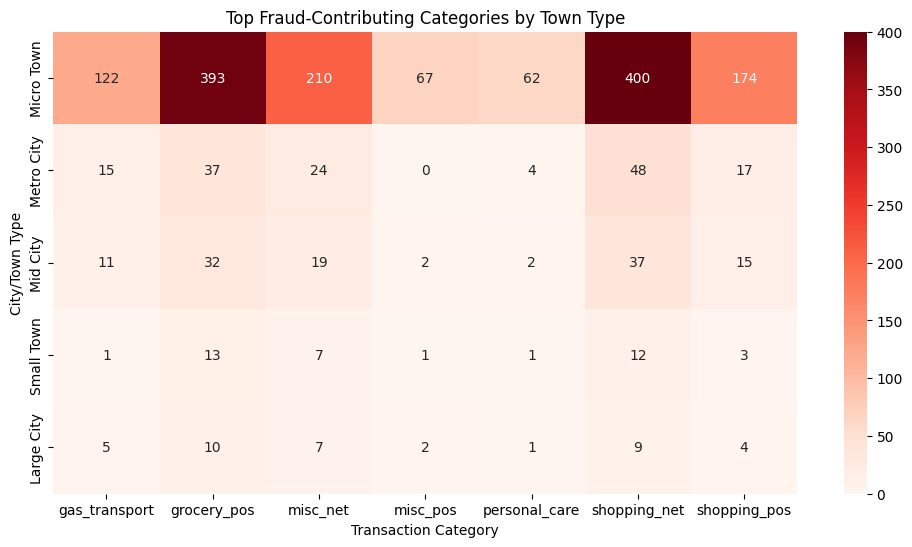

In [104]:
# --- Step 1: Fraud transactions only ---
fraud_df = df[df['is_fraud'] == 1]

# --- Step 2: Fraud count per category (to rank them) ---
fraud_by_category = fraud_df['category'].value_counts()

# Pick top N fraud-heavy categories (say top 7)
top_categories = fraud_by_category.head(7).index

# --- Step 3: Create pivot for only top fraud categories ---
pivot = pd.pivot_table(fraud_df[fraud_df['category'].isin(top_categories)], 
                       index='city_category', 
                       columns='category', 
                       values='is_fraud', 
                       aggfunc='count', 
                       fill_value=0)

# --- Step 4: Sort rows (towns) by fraud count too ---
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

# --- Step 5: Plot heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Reds')
plt.title('Top Fraud-Contributing Categories by Town Type')
plt.xlabel('Transaction Category')
plt.ylabel('City/Town Type')
plt.show()


In [105]:
# below is anlysis of category v/s town category with fruad transaaction counts.

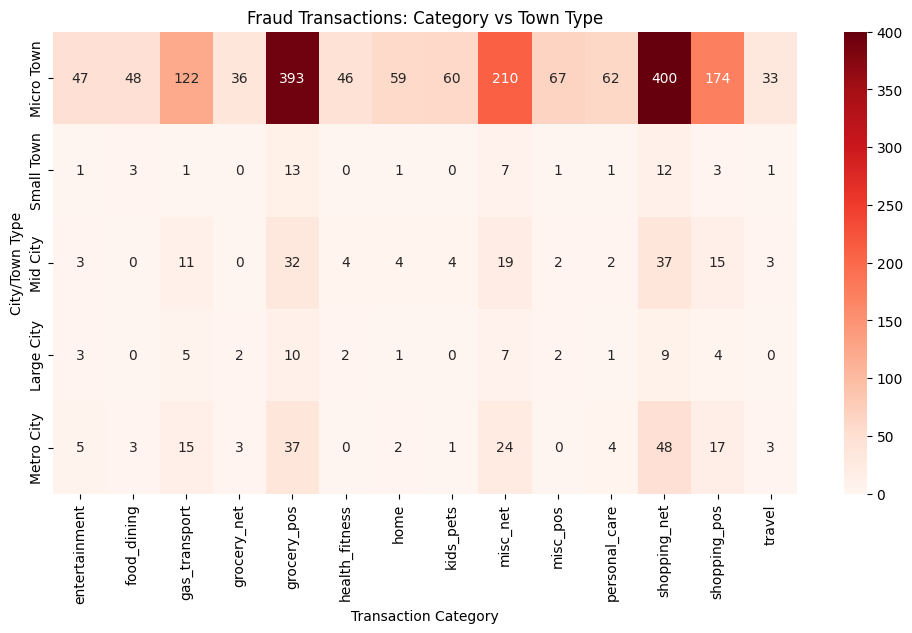

In [106]:
# Filter only fraud transactions
fraud_df = df[df['is_fraud'] == 1]

# Create a pivot table (category vs city_category)
pivot = pd.pivot_table(fraud_df, 
                       index='city_category', 
                       columns='category', 
                       values='is_fraud', 
                       aggfunc='count', 
                       fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Reds')
plt.title('Fraud Transactions: Category vs Town Type')
plt.xlabel('Transaction Category')
plt.ylabel('City/Town Type')
plt.show()

In [107]:
# different categories along with fraud transation counts

In [108]:
category_summary = (
    pd.pivot_table(df, 
                   index='category',
                   values='is_fraud',
                   aggfunc=['count', 'sum'])
    .reset_index()
)

# Rename columns
category_summary.columns = ['category', 'total_transactions', 'fraud_transactions']

# Add fraud percent
category_summary['fraud_percent'] = (category_summary['fraud_transactions'] /
                                     category_summary['total_transactions'] * 100).round(2)

category_summary = category_summary.sort_values(by='fraud_transactions', ascending=False)
print(category_summary)


          category  total_transactions  fraud_transactions  fraud_percent
11    shopping_net               41779                 506              1
4      grocery_pos               52553                 485              1
8         misc_net               27367                 267              1
12    shopping_pos               49791                 213              0
2    gas_transport               56370                 154              0
9         misc_pos               34574                  72              0
10   personal_care               39327                  70              0
6             home               52345                  67              0
7        kids_pets               48692                  65              0
0    entertainment               40104                  59              0
1      food_dining               39268                  54              0
5   health_fitness               36674                  52              0
3      grocery_net               19426

In [109]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,quarter,city_category
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Q2,Metro City
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Q2,Micro Town
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Q2,Small Town
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Q2,Mid City
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Q2,Micro Town
...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Q4,Micro Town
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Q4,Small Town
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Q4,Micro Town
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Q4,Micro Town


In [110]:
df['amt'].describe()

count   555,719
mean         69
std         157
min           1
25%          10
50%          47
75%          83
max      22,768
Name: amt, dtype: float64

In [111]:
df['amt'].max()

22768.11

In [112]:
df.drop(columns=['quarter'],axis=1,inplace=True)

In [113]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Metro City
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Micro Town
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Small Town
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Mid City
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Micro Town
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Micro Town
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Small Town
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Micro Town
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Micro Town


In [114]:
# Define the mapping for 4 bins
category_bins = {
    'grocery_pos': 'Essentials',
    'grocery_net': 'Essentials',
    'gas_transport': 'Essentials',
    'home': 'Essentials',
    
    'personal_care': 'Lifestyle & Wellbeing',
    'health_fitness': 'Lifestyle & Wellbeing',
    'kids_pets': 'Lifestyle & Wellbeing',
    
    'entertainment': 'Discretionary',
    'food_dining': 'Discretionary',
    'travel': 'Discretionary',
    
    'shopping_pos': 'Shopping & Misc',
    'shopping_net': 'Shopping & Misc',
    'misc_pos': 'Shopping & Misc',
    'misc_net': 'Shopping & Misc'
}

# Create a new column with bins
df['category_bin'] = df['category'].map(category_bins)


In [115]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category,category_bin
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Metro City,Lifestyle & Wellbeing
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Micro Town,Lifestyle & Wellbeing
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Small Town,Lifestyle & Wellbeing
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Mid City,Shopping & Misc
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Micro Town,Discretionary
...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Micro Town,Lifestyle & Wellbeing
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Small Town,Lifestyle & Wellbeing
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Micro Town,Lifestyle & Wellbeing
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Micro Town,Discretionary


In [116]:
# Count frauds per bin
fraud_counts = df.groupby('category_bin')['is_fraud'].sum().reset_index()

print(fraud_counts)


            category_bin  is_fraud
0          Discretionary       153
1             Essentials       747
2  Lifestyle & Wellbeing       187
3        Shopping & Misc      1058


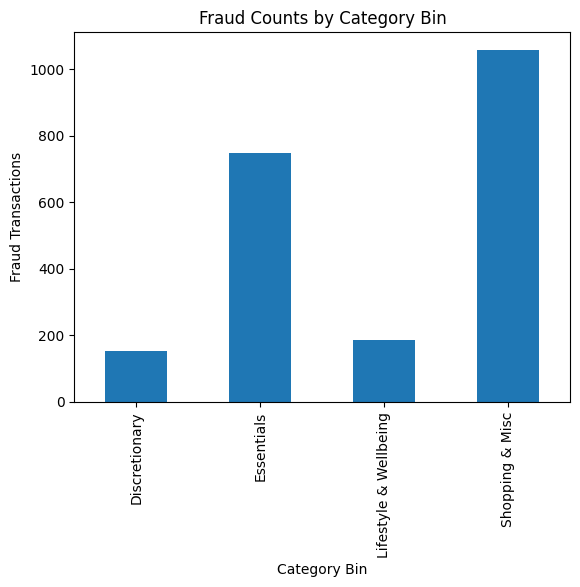

In [117]:
import matplotlib.pyplot as plt

fraud_counts.plot(kind='bar', x='category_bin', y='is_fraud', legend=False)
plt.title('Fraud Counts by Category Bin')
plt.ylabel('Fraud Transactions')
plt.xlabel('Category Bin')
plt.show()


In [118]:
fraud_df = df[df['is_fraud'] == 1]


In [119]:
heatmap_data = fraud_df.pivot_table(
    index='city_category',
    columns='category_bin',
    values='is_fraud',
    aggfunc='count',  # counts the number of fraud transactions
    fill_value=0
)


In [120]:
# category binned v/s city category fraud analysis

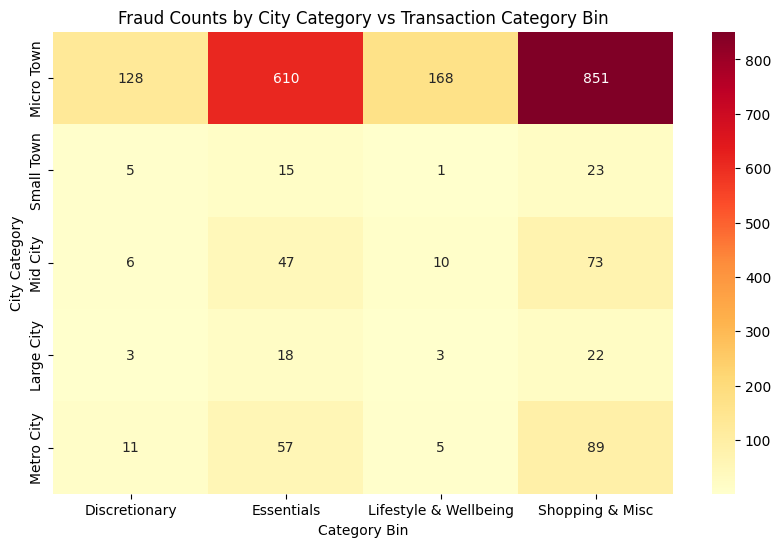

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title('Fraud Counts by City Category vs Transaction Category Bin')
plt.ylabel('City Category')
plt.xlabel('Category Bin')
plt.show()


In [122]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category,category_bin
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Metro City,Lifestyle & Wellbeing
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Micro Town,Lifestyle & Wellbeing
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Small Town,Lifestyle & Wellbeing
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Mid City,Shopping & Misc
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Micro Town,Discretionary
...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Micro Town,Lifestyle & Wellbeing
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Small Town,Lifestyle & Wellbeing
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Micro Town,Lifestyle & Wellbeing
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Micro Town,Discretionary


In [123]:
df_copy = df.copy()

In [124]:
df_copy

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category,category_bin
0,2291163933867244,personal_care,3,M,SC,34,-81,0,46-60,Metro City,Lifestyle & Wellbeing
1,3573030041201292,personal_care,30,F,UT,40,-110,0,31-45,Micro Town,Lifestyle & Wellbeing
2,3598215285024754,health_fitness,41,F,NY,41,-74,0,46-60,Small Town,Lifestyle & Wellbeing
3,3591919803438423,misc_pos,60,M,FL,29,-81,0,31-45,Mid City,Shopping & Misc
4,3526826139003047,travel,3,M,MI,44,-85,0,61-75,Micro Town,Discretionary
...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,MO,40,-92,0,46-60,Micro Town,Lifestyle & Wellbeing
555715,3556613125071656,kids_pets,112,M,TX,29,-95,0,19-30,Small Town,Lifestyle & Wellbeing
555716,6011724471098086,kids_pets,87,F,WA,46,-119,0,31-45,Micro Town,Lifestyle & Wellbeing
555717,4079773899158,travel,8,M,ID,45,-116,0,46-60,Micro Town,Discretionary


In [125]:
# using lat and long columns --> finding some info from this 

In [126]:
import reverse_geocoder as rg
import pandas as pd

# Assuming your DataFrame is called df and has 'lat' and 'long' columns
# Example:
# df = pd.read_csv("your_data.csv")  # if reading from CSV

# Create a list of (lat, long) tuples
coords = list(zip(df['lat'], df['long']))

# Perform reverse geocoding for all coordinates at once
results = rg.search(coords)  # returns list of dicts

# Extract city, state, country from results
df['city'] = [r['name'] for r in results]
df['state'] = [r['admin1'] for r in results]
df['country'] = [r['cc'] for r in results]

# Optional: save to CSV
# df.to_csv("df_with_locations.csv", index=False)

print(df.head())


Loading formatted geocoded file...
             cc_num        category  amt gender           state  lat  long  \
0  2291163933867244   personal_care    3      M  South Carolina   34   -81   
1  3573030041201292   personal_care   30      F            Utah   40  -110   
2  3598215285024754  health_fitness   41      F        New York   41   -74   
3  3591919803438423        misc_pos   60      M         Florida   29   -81   
4  3526826139003047          travel    3      M        Michigan   44   -85   

   is_fraud age_group city_category           category_bin          city  \
0         0     46-60    Metro City  Lifestyle & Wellbeing  Forest Acres   
1         0     31-45    Micro Town  Lifestyle & Wellbeing      Duchesne   
2         0     46-60    Small Town  Lifestyle & Wellbeing      Bellmore   
3         0     31-45      Mid City        Shopping & Misc    Titusville   
4         0     61-75    Micro Town          Discretionary     Lake City   

  country  
0      US  
1      US  
2  

In [127]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category,category_bin,city,country
0,2291163933867244,personal_care,3,M,South Carolina,34,-81,0,46-60,Metro City,Lifestyle & Wellbeing,Forest Acres,US
1,3573030041201292,personal_care,30,F,Utah,40,-110,0,31-45,Micro Town,Lifestyle & Wellbeing,Duchesne,US
2,3598215285024754,health_fitness,41,F,New York,41,-74,0,46-60,Small Town,Lifestyle & Wellbeing,Bellmore,US
3,3591919803438423,misc_pos,60,M,Florida,29,-81,0,31-45,Mid City,Shopping & Misc,Titusville,US
4,3526826139003047,travel,3,M,Michigan,44,-85,0,61-75,Micro Town,Discretionary,Lake City,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,Missouri,40,-92,0,46-60,Micro Town,Lifestyle & Wellbeing,Kahoka,US
555715,3556613125071656,kids_pets,112,M,Texas,29,-95,0,19-30,Small Town,Lifestyle & Wellbeing,Lake Jackson,US
555716,6011724471098086,kids_pets,87,F,Washington,46,-119,0,31-45,Micro Town,Lifestyle & Wellbeing,Burbank,US
555717,4079773899158,travel,8,M,Idaho,45,-116,0,46-60,Micro Town,Discretionary,Council,US


In [128]:
df['state'].nunique()

54

In [129]:
df['state'].unique()

array(['South Carolina', 'Utah', 'New York', 'Florida', 'Michigan',
       'California', 'South Dakota', 'Pennsylvania', 'Texas', 'Kentucky',
       'Wyoming', 'Alabama', 'Louisiana', 'Georgia', 'Colorado', 'Ohio',
       'Wisconsin', 'Vermont', 'Arkansas', 'New Jersey', 'Iowa',
       'Maryland', 'Mississippi', 'Kansas', 'Illinois', 'Missouri',
       'Maine', 'Tennessee', 'Washington, D.C.', 'Arizona', 'Montana',
       'Oklahoma', 'Washington', 'West Virginia', 'New Mexico',
       'Massachusetts', 'Nebraska', 'Virginia', 'Idaho', 'Oregon',
       'Indiana', 'North Carolina', 'New Hampshire', 'Minnesota',
       'Delaware', 'North Dakota', 'British Columbia', 'Ontario',
       'Connecticut', 'Nevada', 'Hawaii', 'Saskatchewan', 'Rhode Island',
       'Alaska'], dtype=object)

In [130]:
df['city'].nunique()

840

In [131]:
df['city'].unique()

array(['Forest Acres', 'Duchesne', 'Bellmore', 'Titusville', 'Lake City',
       'Horseheads North', 'Hydesville', 'Salem', 'Shiloh', 'Mart',
       'Buckner', 'Fort Washakie', 'Royal Palm Beach', 'Washingtonville',
       'Valley Grande', 'Deltona', 'Big Pine Key', 'Grandview',
       'Sorrento', 'Stoneboro', 'Alpharetta', 'Cimarron Hills',
       'Greenville', 'Tomahawk', 'Goodrich', 'Broadmoor',
       'Manchester Center', 'Lepanto', 'New Waverly', 'Manhattan',
       'Pewee Valley', 'North Plainfield', 'Belmond', 'Guttenberg',
       'Manchester', 'Monticello', 'Hawthorne', 'Glencoe', 'Homewood',
       'Sigourney', 'Baton Rouge', 'Shavano Park', 'Bingham Farms',
       'La Crosse', 'Ames', 'La Harpe', 'Point of Rocks', 'Sunflower',
       'Ogdensburg', 'Centerville', 'Sedgwick', 'Humboldt Hill',
       'Four Seasons', 'Port Saint Lucie', 'South Barre', 'Tiptonville',
       'Washington, D.C.', 'South Highpoint', 'New York City', 'Superior',
       'Glendale', 'Lorenz Park', 'Rock 

In [132]:
df['country'].nunique()

2

In [133]:
df['country'].unique()

array(['US', 'CA'], dtype=object)

  country  fraud_count
1      US         2138
0      CA            7


C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\1914280818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_counts, x='country', y='fraud_count', palette='viridis')


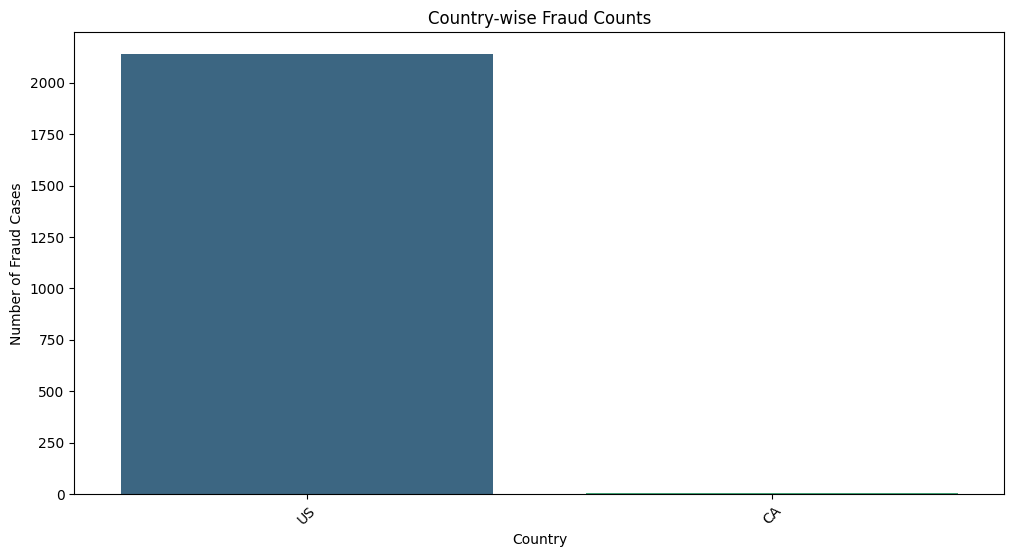

In [134]:
# Aggregate: count of fraud cases per country
fraud_counts = df[df['is_fraud'] == 1].groupby('country').size().reset_index(name='fraud_count')

# Sort descending for better visualization
fraud_counts = fraud_counts.sort_values(by='fraud_count', ascending=False)

print(fraud_counts)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=fraud_counts, x='country', y='fraud_count', palette='viridis')
plt.title('Country-wise Fraud Counts')
plt.xlabel('Country')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()

In [135]:
# Group by country and aggregate
country_summary = df.groupby('country').agg(
    total_transactions = ('is_fraud', 'count'),
    fraud_transactions = ('is_fraud', 'sum')
).reset_index()

# Optional: add fraud percentage
country_summary['fraud_percentage'] = (country_summary['fraud_transactions'] / country_summary['total_transactions'] * 100).round(2)

# Sort by fraud transactions descending
country_summary = country_summary.sort_values(by='fraud_transactions', ascending=False)

print(country_summary)

  country  total_transactions  fraud_transactions  fraud_percentage
1      US              552141                2138                 0
0      CA                3578                   7                 0


In [136]:
# Total fraud transactions
total_fraud = df['is_fraud'].sum()

print("Total fraud transactions:", total_fraud)


Total fraud transactions: 2145


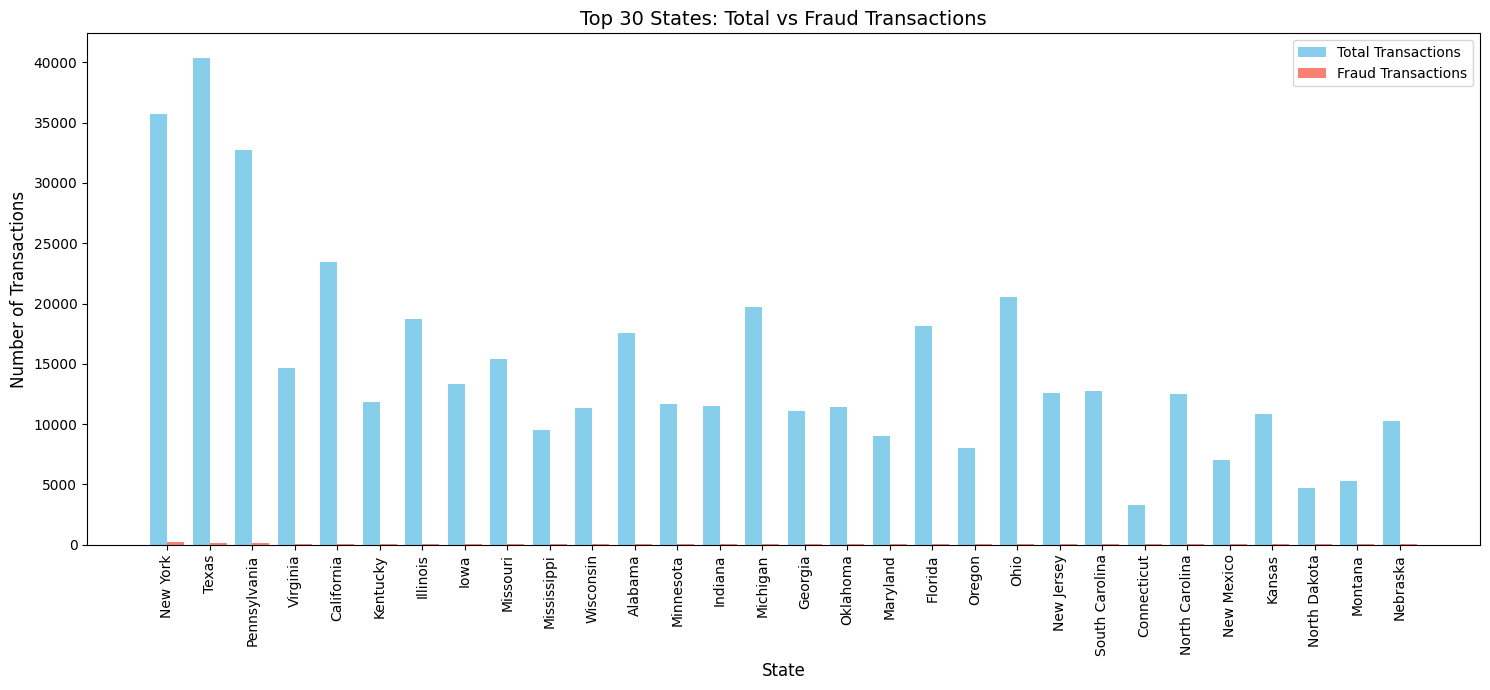

In [137]:
# Aggregate total transactions and fraud transactions per state
state_summary = df.groupby('state').agg(
    total_transactions=('is_fraud', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Sort by fraud transactions descending and pick top 30 states
top_states = state_summary.sort_values(by='fraud_transactions', ascending=False).head(30)

# Plot
plt.figure(figsize=(15,7))
bar_width = 0.4

# Set positions for bars
r1 = range(len(top_states))
r2 = [x + bar_width for x in r1]

# Plot total transactions
plt.bar(r1, top_states['total_transactions'], color='skyblue', width=bar_width, label='Total Transactions')

# Plot fraud transactions
plt.bar(r2, top_states['fraud_transactions'], color='salmon', width=bar_width, label='Fraud Transactions')

# Labels and titles
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Top 30 States: Total vs Fraud Transactions', fontsize=14)
plt.xticks([r + bar_width/2 for r in r1], top_states['state'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

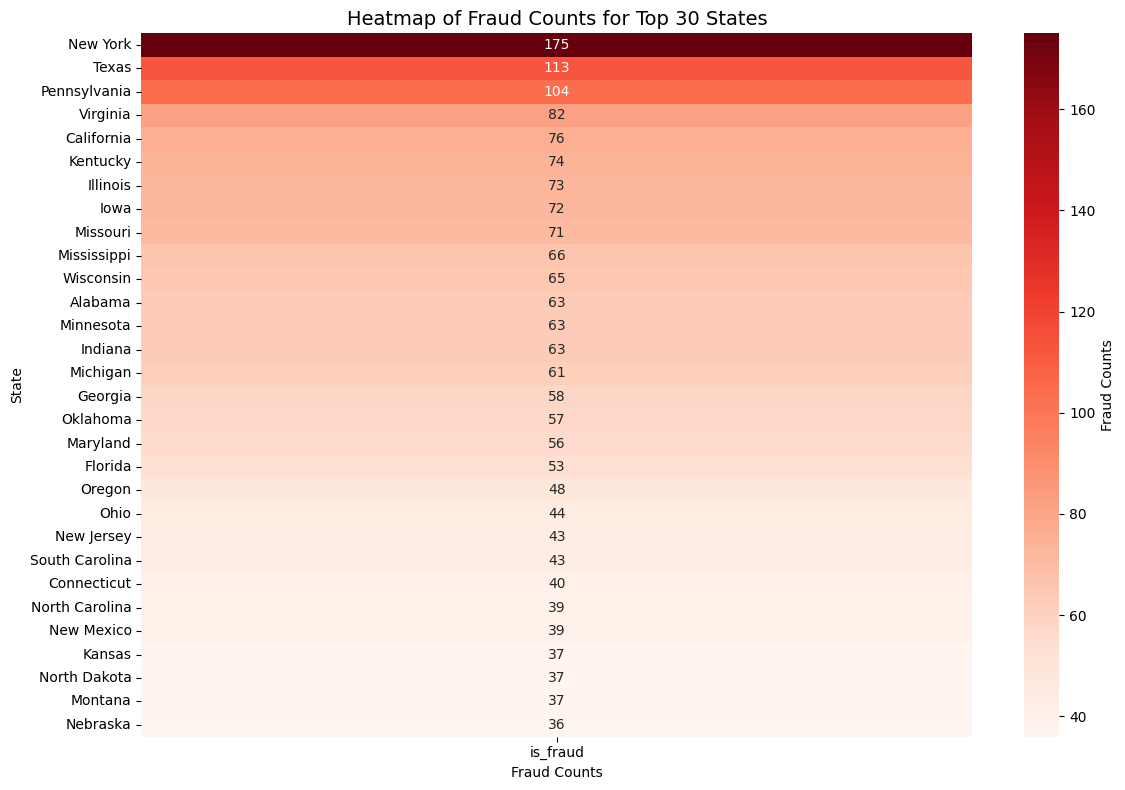

In [138]:
# Assuming your DataFrame is df and has 'state' and 'is_fraud' columns

# Aggregate fraud counts per state
state_fraud = df.groupby('state')['is_fraud'].sum().reset_index()

# Sort descending and pick top 30 states
top_states = state_fraud.sort_values(by='is_fraud', ascending=False).head(30)

# Create a DataFrame suitable for heatmap
# Since we have only one metric (fraud count), we can just make state as index
heatmap_data = top_states.set_index('state')

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Reds', cbar_kws={'label': 'Fraud Counts'})
plt.title('Heatmap of Fraud Counts for Top 30 States', fontsize=14)
plt.ylabel('State')
plt.xlabel('Fraud Counts')
plt.tight_layout()
plt.show()

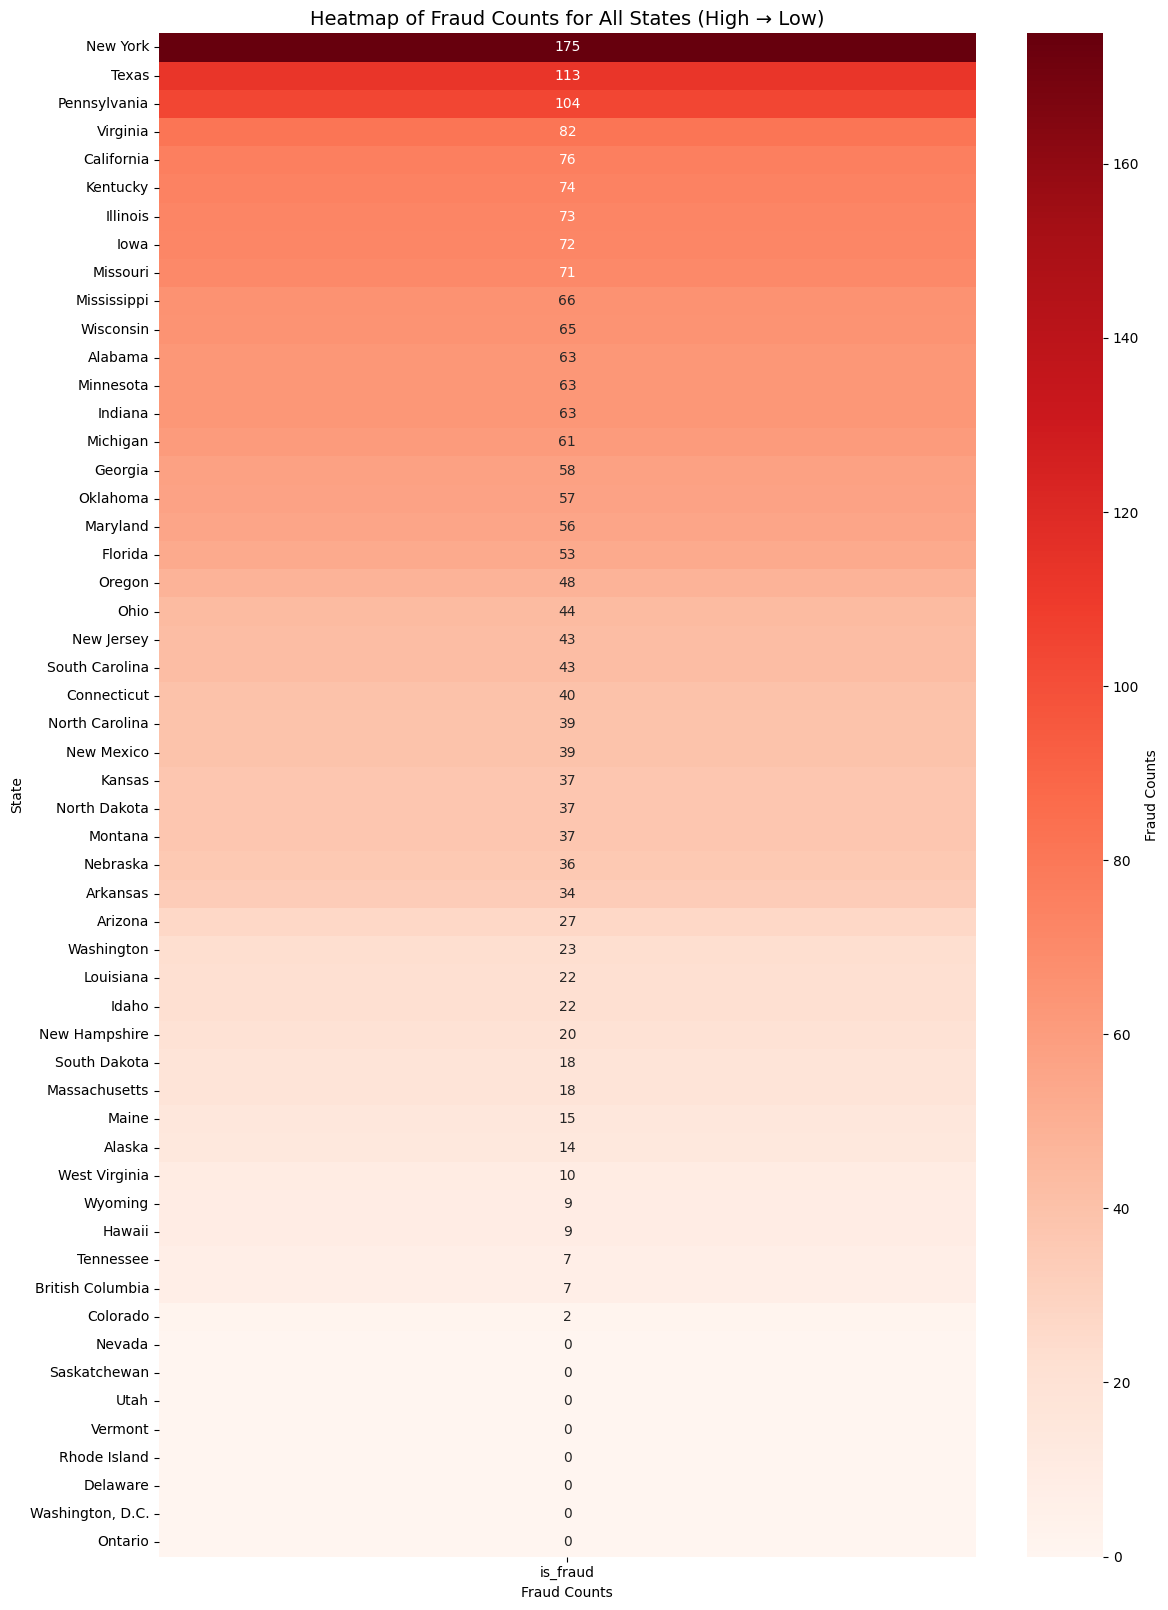

In [139]:
# Aggregate fraud counts per state
# Aggregate fraud counts per state
state_fraud = df.groupby('state')['is_fraud'].sum().reset_index()

# Sort by fraud counts descending
state_fraud = state_fraud.sort_values(by='is_fraud', ascending=False)

# Set state as index for heatmap
heatmap_data = state_fraud.set_index('state')

# Plot heatmap
plt.figure(figsize=(12, len(heatmap_data)*0.3))  # dynamic height based on number of states
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Reds', cbar_kws={'label': 'Fraud Counts'})
plt.title('Heatmap of Fraud Counts for All States (High → Low)', fontsize=14)
plt.ylabel('State')
plt.xlabel('Fraud Counts')
plt.tight_layout()
plt.show()

In [140]:
# Aggregate fraud counts per city
city_fraud = df.groupby('city')['is_fraud'].sum().reset_index()

# Sort descending and pick top 100 cities
top_cities = city_fraud.sort_values(by='is_fraud', ascending=False).head(200)

C:\Users\sahil\AppData\Local\Temp\ipykernel_19048\3044153344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='city', y='is_fraud', palette='Reds')


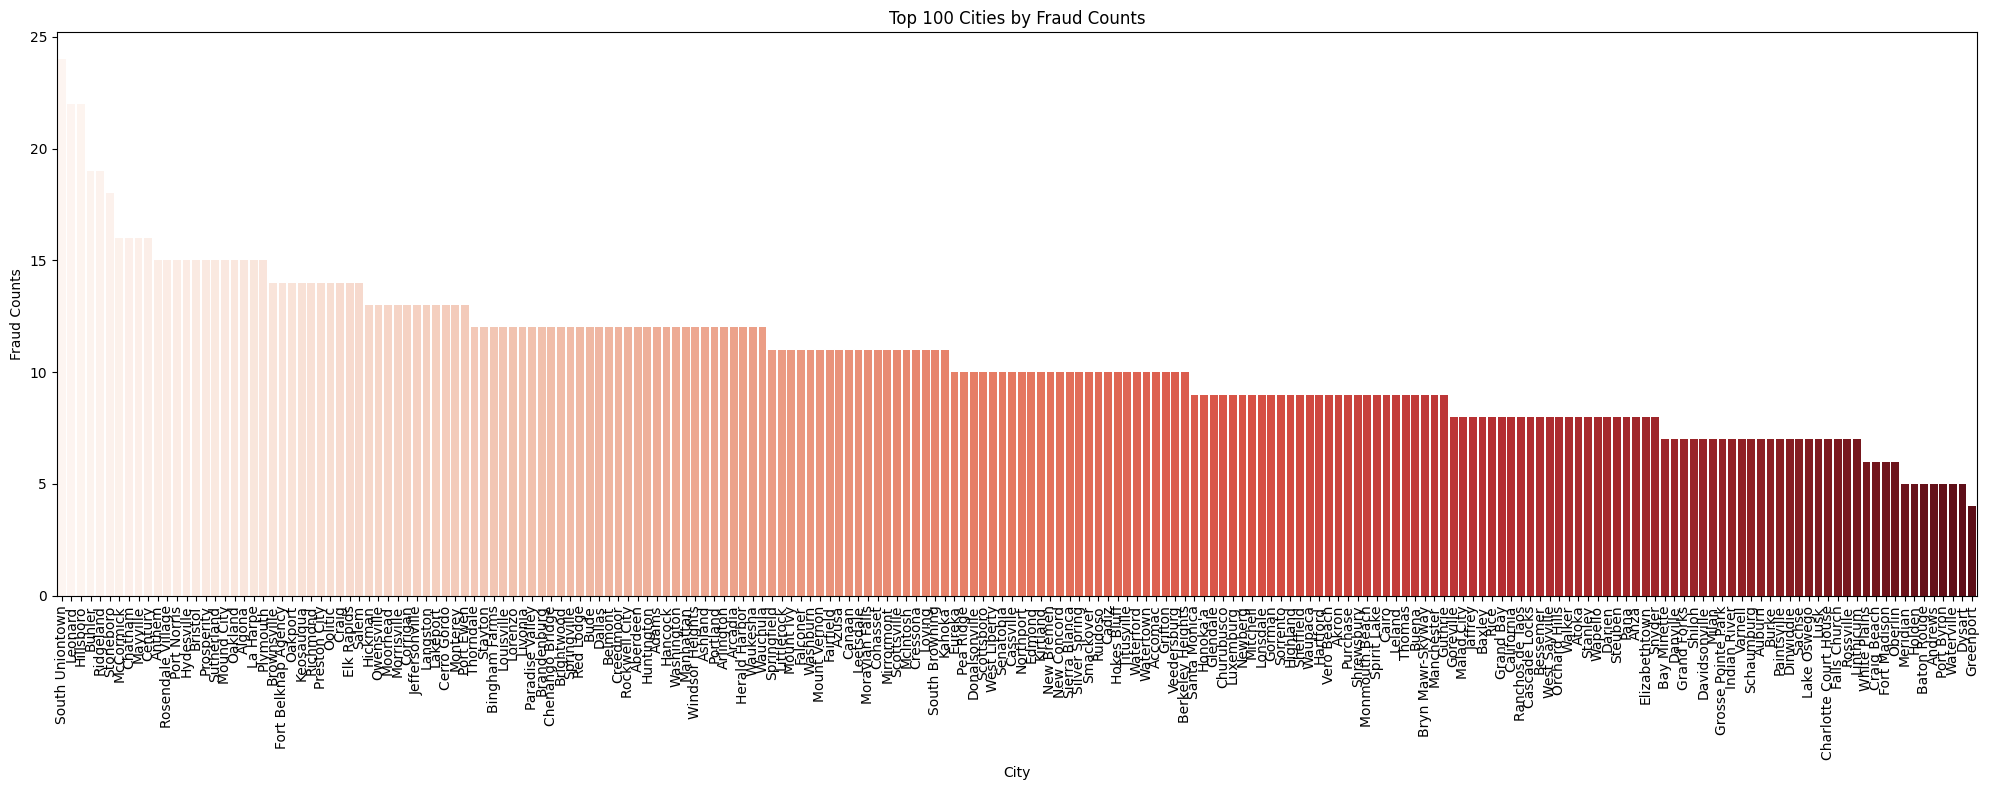

In [141]:
plt.figure(figsize=(20,8))
sns.barplot(data=top_cities, x='city', y='is_fraud', palette='Reds')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Fraud Counts')
plt.title('Top 100 Cities by Fraud Counts')
plt.tight_layout()
plt.show()


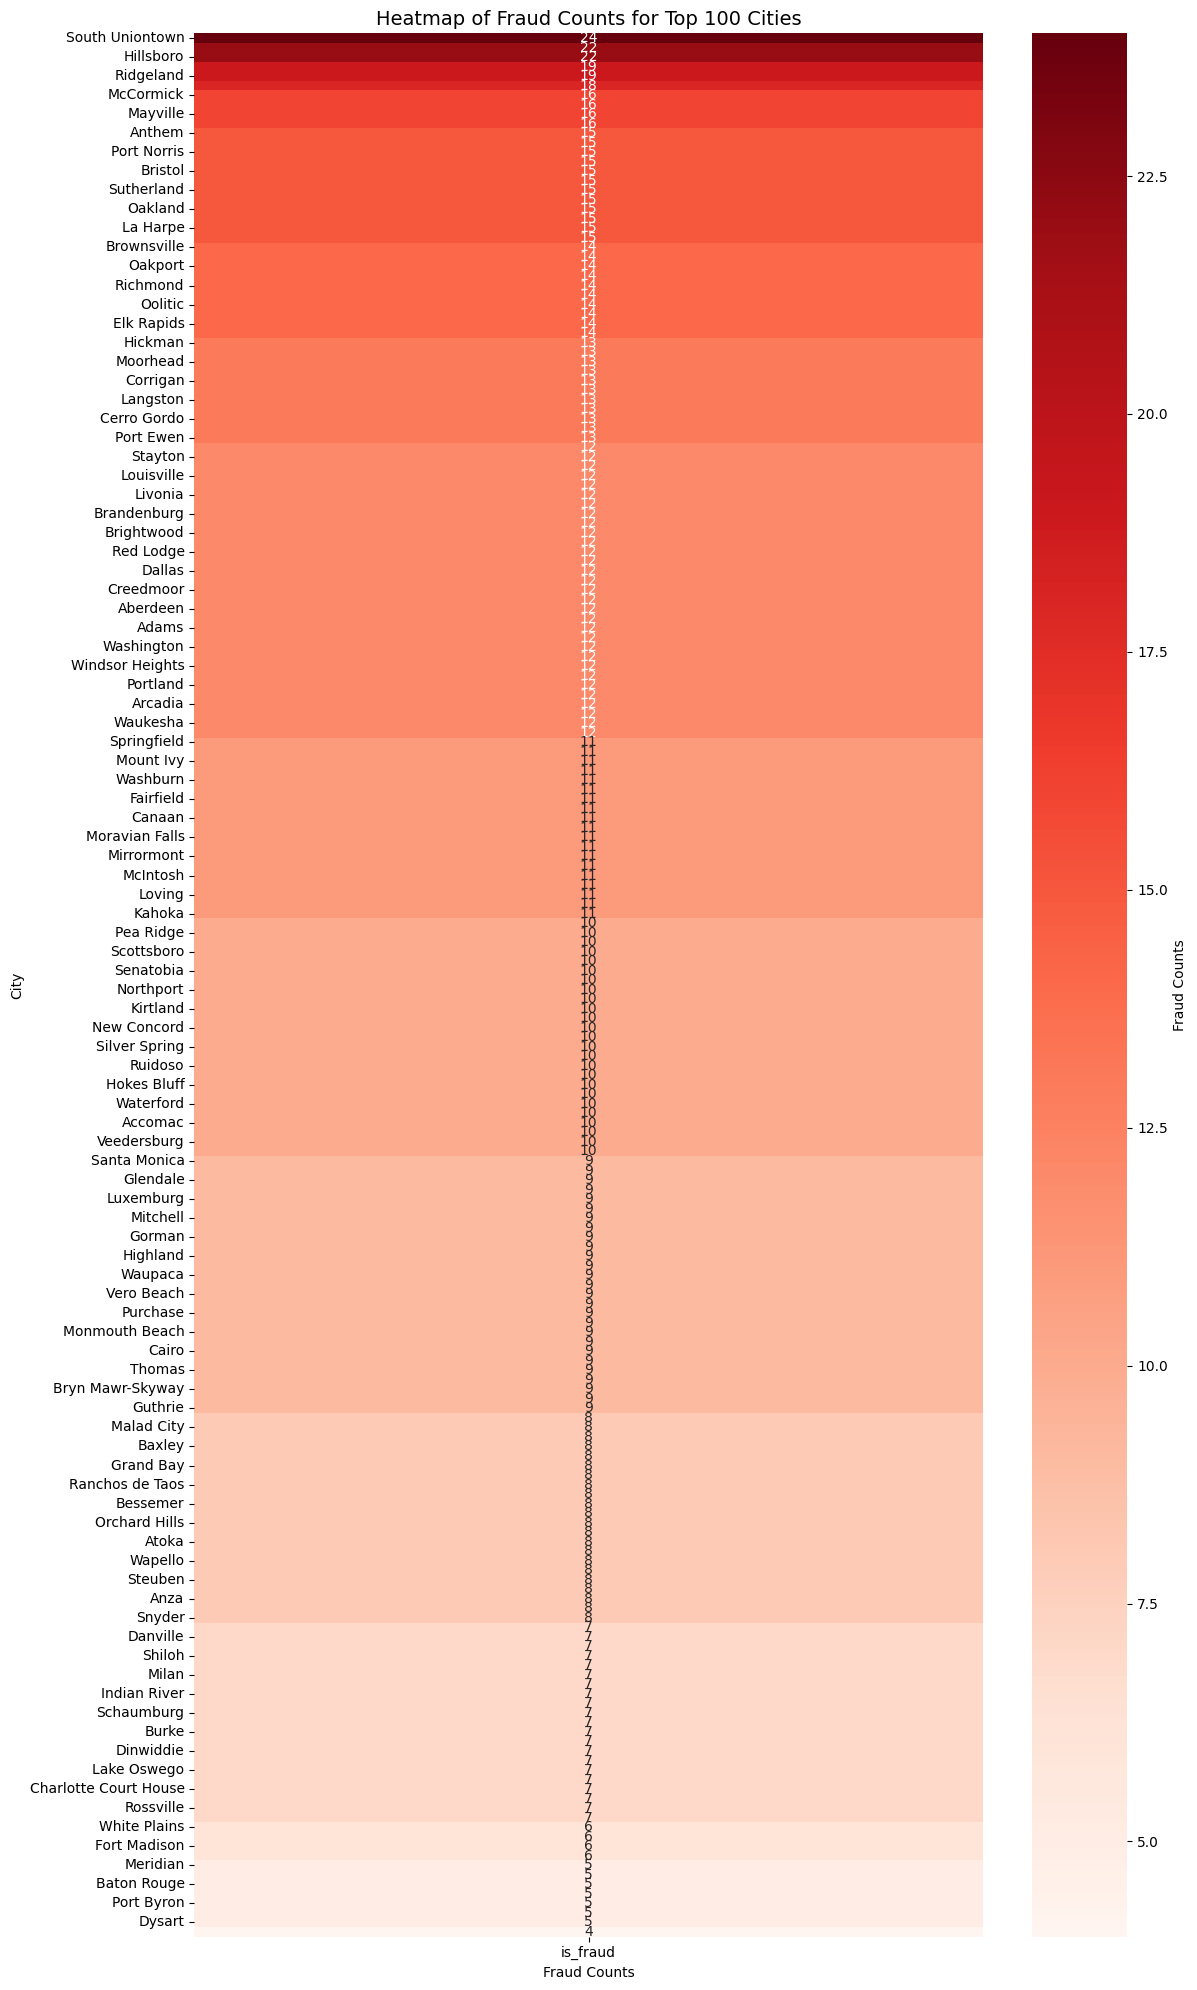

In [142]:
# Prepare heatmap data
heatmap_data = top_cities.set_index('city')

plt.figure(figsize=(12, 20))  # taller figure for 100 cities
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Reds', cbar_kws={'label': 'Fraud Counts'})
plt.title('Heatmap of Fraud Counts for Top 100 Cities', fontsize=14)
plt.ylabel('City')
plt.xlabel('Fraud Counts')
plt.tight_layout()
plt.show()


In [143]:
df

,cc_num,category,amt,gender,state,lat,long,is_fraud,age_group,city_category,category_bin,city,country
0,2291163933867244,personal_care,3,M,South Carolina,34,-81,0,46-60,Metro City,Lifestyle & Wellbeing,Forest Acres,US
1,3573030041201292,personal_care,30,F,Utah,40,-110,0,31-45,Micro Town,Lifestyle & Wellbeing,Duchesne,US
2,3598215285024754,health_fitness,41,F,New York,41,-74,0,46-60,Small Town,Lifestyle & Wellbeing,Bellmore,US
3,3591919803438423,misc_pos,60,M,Florida,29,-81,0,31-45,Mid City,Shopping & Misc,Titusville,US
4,3526826139003047,travel,3,M,Michigan,44,-85,0,61-75,Micro Town,Discretionary,Lake City,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,44,M,Missouri,40,-92,0,46-60,Micro Town,Lifestyle & Wellbeing,Kahoka,US
555715,3556613125071656,kids_pets,112,M,Texas,29,-95,0,19-30,Small Town,Lifestyle & Wellbeing,Lake Jackson,US
555716,6011724471098086,kids_pets,87,F,Washington,46,-119,0,31-45,Micro Town,Lifestyle & Wellbeing,Burbank,US
555717,4079773899158,travel,8,M,Idaho,45,-116,0,46-60,Micro Town,Discretionary,Council,US


In [144]:
# dropping the remaining unnecessary columns

In [145]:
df.drop(['category', 'cc_num', 'lat','long','country','city'], axis=1, inplace=True)

In [146]:
df

,amt,gender,state,is_fraud,age_group,city_category,category_bin
0,3,M,South Carolina,0,46-60,Metro City,Lifestyle & Wellbeing
1,30,F,Utah,0,31-45,Micro Town,Lifestyle & Wellbeing
2,41,F,New York,0,46-60,Small Town,Lifestyle & Wellbeing
3,60,M,Florida,0,31-45,Mid City,Shopping & Misc
4,3,M,Michigan,0,61-75,Micro Town,Discretionary
...,...,...,...,...,...,...,...
555714,44,M,Missouri,0,46-60,Micro Town,Lifestyle & Wellbeing
555715,112,M,Texas,0,19-30,Small Town,Lifestyle & Wellbeing
555716,87,F,Washington,0,31-45,Micro Town,Lifestyle & Wellbeing
555717,8,M,Idaho,0,46-60,Micro Town,Discretionary


In [147]:
# As majority of states are of US. so we can binned them according th region .

In [148]:
state_to_region = {
    # 🔹 Western
    'California': 'Western', 'Oregon': 'Western', 'Washington': 'Western',
    'Nevada': 'Western', 'Idaho': 'Western', 'Montana': 'Western',
    'Wyoming': 'Western', 'Utah': 'Western', 'Colorado': 'Western',
    'Alaska': 'Western', 'Hawaii': 'Western',
    'British Columbia': 'Western','Arizona': 'Western',
    'New Mexico': 'Western',

    # 🔹 Northern (Midwest + Plains + Saskatchewan)
    'North Dakota': 'Northern', 'South Dakota': 'Northern',
    'Nebraska': 'Northern', 'Kansas': 'Northern',
    'Minnesota': 'Northern', 'Iowa': 'Northern', 'Missouri': 'Northern',
    'Wisconsin': 'Northern', 'Illinois': 'Northern', 'Indiana': 'Northern',
    'Michigan': 'Northern', 'Ohio': 'Northern',
    'Saskatchewan': 'Northern',

    # 🔹 Southern
    'Texas': 'Southern', 'Oklahoma': 'Southern', 'Arkansas': 'Southern',
    'Louisiana': 'Southern', 'Kentucky': 'Southern', 'Tennessee': 'Southern',
    'Mississippi': 'Southern', 'Alabama': 'Southern', 'Georgia': 'Southern',
    'Florida': 'Southern', 'South Carolina': 'Southern',
    'North Carolina': 'Southern', 'Virginia': 'Southern',
    'West Virginia': 'Southern', 'Maryland': 'Southern',
    'Delaware': 'Southern', 'Washington, D.C.': 'Southern',

    # 🔹 Eastern / Northeastern
    'Maine': 'Eastern', 'New Hampshire': 'Eastern',
    'Vermont': 'Eastern', 'Massachusetts': 'Eastern',
    'Rhode Island': 'Eastern', 'Connecticut': 'Eastern',
    'New York': 'Eastern', 'New Jersey': 'Eastern',
    'Pennsylvania': 'Eastern',
    'Ontario': 'Eastern'
}


In [149]:
df['region'] = df['state'].map(state_to_region)


In [150]:
df

,amt,gender,state,is_fraud,age_group,city_category,category_bin,region
0,3,M,South Carolina,0,46-60,Metro City,Lifestyle & Wellbeing,Southern
1,30,F,Utah,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
2,41,F,New York,0,46-60,Small Town,Lifestyle & Wellbeing,Eastern
3,60,M,Florida,0,31-45,Mid City,Shopping & Misc,Southern
4,3,M,Michigan,0,61-75,Micro Town,Discretionary,Northern
...,...,...,...,...,...,...,...,...
555714,44,M,Missouri,0,46-60,Micro Town,Lifestyle & Wellbeing,Northern
555715,112,M,Texas,0,19-30,Small Town,Lifestyle & Wellbeing,Southern
555716,87,F,Washington,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
555717,8,M,Idaho,0,46-60,Micro Town,Discretionary,Western


df.drop(['state'],axis=1,inplace=True)

In [151]:
df

,amt,gender,state,is_fraud,age_group,city_category,category_bin,region
0,3,M,South Carolina,0,46-60,Metro City,Lifestyle & Wellbeing,Southern
1,30,F,Utah,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
2,41,F,New York,0,46-60,Small Town,Lifestyle & Wellbeing,Eastern
3,60,M,Florida,0,31-45,Mid City,Shopping & Misc,Southern
4,3,M,Michigan,0,61-75,Micro Town,Discretionary,Northern
...,...,...,...,...,...,...,...,...
555714,44,M,Missouri,0,46-60,Micro Town,Lifestyle & Wellbeing,Northern
555715,112,M,Texas,0,19-30,Small Town,Lifestyle & Wellbeing,Southern
555716,87,F,Washington,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
555717,8,M,Idaho,0,46-60,Micro Town,Discretionary,Western


In [152]:
print(df['city_category'].unique())
print(df['region'].unique())
print(df['category_bin'].unique())

['Metro City', 'Micro Town', 'Small Town', 'Mid City', 'Large City']
Categories (5, object): ['Micro Town' < 'Small Town' < 'Mid City' < 'Large City' < 'Metro City']
['Southern' 'Western' 'Eastern' 'Northern']
['Lifestyle & Wellbeing' 'Shopping & Misc' 'Discretionary' 'Essentials']


In [153]:
df['age_group'].unique()

['46-60', '31-45', '61-75', '19-30', '76+']
Categories (6, object): ['0-18' < '19-30' < '31-45' < '46-60' < '61-75' < '76+']

In [154]:
# now feature engineering the categorical columns using onehotencoder 

In [155]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_cols = ['gender', 'region', 'category_bin', 'city_category','age_group']

# Initialize encoder (drop first to avoid dummy variable trap)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit & transform
encoded = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame with feature names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate back with original dataframe
df_final = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

print(df_final.head())

   amt           state  is_fraud  gender_M  region_Northern  region_Southern  \
0    3  South Carolina         0         1                0                1   
1   30            Utah         0         0                0                0   
2   41        New York         0         0                0                0   
3   60         Florida         0         1                0                1   
4    3        Michigan         0         1                1                0   

   region_Western  category_bin_Essentials  \
0               0                        0   
1               1                        0   
2               0                        0   
3               0                        0   
4               0                        0   

   category_bin_Lifestyle & Wellbeing  category_bin_Shopping & Misc  \
0                                   1                             0   
1                                   1                             0   
2                            

In [156]:
df_final

,amt,state,is_fraud,gender_M,region_Northern,region_Southern,region_Western,category_bin_Essentials,category_bin_Lifestyle & Wellbeing,category_bin_Shopping & Misc,city_category_Metro City,city_category_Micro Town,city_category_Mid City,city_category_Small Town,age_group_31-45,age_group_46-60,age_group_61-75,age_group_76+
0,3,South Carolina,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,30,Utah,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,41,New York,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,60,Florida,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,3,Michigan,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,44,Missouri,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
555715,112,Texas,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
555716,87,Washington,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
555717,8,Idaho,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [157]:
print(encoder.categories_)


[array(['F', 'M'], dtype=object), array(['Eastern', 'Northern', 'Southern', 'Western'], dtype=object), array(['Discretionary', 'Essentials', 'Lifestyle & Wellbeing',
       'Shopping & Misc'], dtype=object), array(['Large City', 'Metro City', 'Micro Town', 'Mid City', 'Small Town'],
      dtype=object), array(['19-30', '31-45', '46-60', '61-75', '76+'], dtype=object)]


In [158]:
df

,amt,gender,state,is_fraud,age_group,city_category,category_bin,region
0,3,M,South Carolina,0,46-60,Metro City,Lifestyle & Wellbeing,Southern
1,30,F,Utah,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
2,41,F,New York,0,46-60,Small Town,Lifestyle & Wellbeing,Eastern
3,60,M,Florida,0,31-45,Mid City,Shopping & Misc,Southern
4,3,M,Michigan,0,61-75,Micro Town,Discretionary,Northern
...,...,...,...,...,...,...,...,...
555714,44,M,Missouri,0,46-60,Micro Town,Lifestyle & Wellbeing,Northern
555715,112,M,Texas,0,19-30,Small Town,Lifestyle & Wellbeing,Southern
555716,87,F,Washington,0,31-45,Micro Town,Lifestyle & Wellbeing,Western
555717,8,M,Idaho,0,46-60,Micro Town,Discretionary,Western


In [159]:
df_final

,amt,state,is_fraud,gender_M,region_Northern,region_Southern,region_Western,category_bin_Essentials,category_bin_Lifestyle & Wellbeing,category_bin_Shopping & Misc,city_category_Metro City,city_category_Micro Town,city_category_Mid City,city_category_Small Town,age_group_31-45,age_group_46-60,age_group_61-75,age_group_76+
0,3,South Carolina,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,30,Utah,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,41,New York,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,60,Florida,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,3,Michigan,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,44,Missouri,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
555715,112,Texas,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
555716,87,Washington,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
555717,8,Idaho,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [160]:
df_final.drop(['state'],axis=1,inplace=True)

In [161]:
df_final

,amt,is_fraud,gender_M,region_Northern,region_Southern,region_Western,category_bin_Essentials,category_bin_Lifestyle & Wellbeing,category_bin_Shopping & Misc,city_category_Metro City,city_category_Micro Town,city_category_Mid City,city_category_Small Town,age_group_31-45,age_group_46-60,age_group_61-75,age_group_76+
0,3,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,30,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,41,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,60,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,44,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
555715,112,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
555716,87,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
555717,8,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [162]:
# WOe and IV

In [163]:
# now calculating woe and iv for each of the columns

In [164]:
import pandas as pd
import numpy as np

def calc_woe_iv_enhanced(df, feature, target):
    """
    Enhanced WOE and IV calculation with better precision and display
    """
    # Create a grouped dataframe
    grouped = df.groupby(feature)[target].agg(['count', 'sum']).reset_index()
    grouped.columns = [feature, 'total', 'events']
    
    # Non-events = total - events
    grouped['non_events'] = grouped['total'] - grouped['events']
    
    # Distribution of events and non-events
    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()
    
    # Calculate distributions with higher precision
    grouped['dist_event'] = grouped['events'] / total_events
    grouped['dist_non_event'] = grouped['non_events'] / total_non_events
    
    # WOE calculation (add small number to avoid log(0))
    grouped['woe'] = np.log((grouped['dist_event'] + 1e-10) / (grouped['dist_non_event'] + 1e-10))
    
    # IV calculation
    grouped['iv'] = (grouped['dist_event'] - grouped['dist_non_event']) * grouped['woe']
    
    # Add feature name
    grouped['feature'] = feature
    
    # Calculate fraud rates for interpretation
    grouped['fraud_rate'] = grouped['events'] / grouped['total']
    
    # Total IV for feature
    iv_value = grouped['iv'].sum()
    
    # Reorder columns for better display
    result_cols = [feature, 'total', 'events', 'non_events', 'fraud_rate', 
                   'dist_event', 'dist_non_event', 'woe', 'iv', 'feature']
    grouped = grouped[result_cols]
    
    return grouped, iv_value

# Usage with better formatting
def display_woe_analysis(df, feature, target):
    """Display WOE analysis with proper formatting"""
    woe_table, iv_val = calc_woe_iv_enhanced(df, feature, target)
    
    print(f"WOE & IV Analysis for Feature: {feature}")
    print("=" * 60)
    
    # Format the display
    pd.set_option('display.precision', 6)
    pd.set_option('display.width', None)
    pd.set_option('display.max_columns', None)
    
    print(woe_table.round(6))
    print(f"\nTotal IV for feature: {iv_val:.6f}")
    
    # IV interpretation
    if iv_val < 0.02:
        strength = "Not useful for prediction"
    elif iv_val < 0.1:
        strength = "Weak predictive power"
    elif iv_val < 0.3:
        strength = "Medium predictive power" 
    elif iv_val < 0.5:
        strength = "Strong predictive power"
    else:
        strength = "Too good to be true (suspicious)"
    
    print(f"IV Interpretation: {strength}")
    
    return woe_table, iv_val

# Example usage:
# woe_table, iv_val = display_woe_analysis(df_final, 'city_category_Micro Town', 'is_fraud')

woe_table, iv_val = display_woe_analysis(df_final, 'city_category_Micro Town', 'is_fraud')

In [165]:
# WOE and IV for individual feature

In [166]:
import pandas as pd
import numpy as np

def calc_woe_iv(df, feature, target):
    """
    Calculate WOE and IV for a single categorical feature.
    df: dataframe
    feature: column name of the categorical feature
    target: target variable column name (binary: 0/1)
    """
    # Create a grouped dataframe
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'events'})
    
    # Non-events = total - events
    grouped['non_events'] = grouped['total'] - grouped['events']
    
    # Distribution of events and non-events
    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()
    grouped['dist_event'] = grouped['events'] / total_events
    grouped['dist_non_event'] = grouped['non_events'] / total_non_events
    
    # WOE calculation (add small number to avoid log(0))
    grouped['woe'] = np.log((grouped['dist_event'] + 1e-6) / (grouped['dist_non_event'] + 1e-6))
    
    # IV calculation
    grouped['iv'] = (grouped['dist_event'] - grouped['dist_non_event']) * grouped['woe']
    
    # Feature name for clarity
    grouped['feature'] = feature
    
    # Total IV for feature
    iv_value = grouped['iv'].sum()
    
    return grouped, iv_value


# --------------------------
# 🔹 Example usage:
# Replace 'gender_M' with the column you want to analyze
woe_table, iv_val = calc_woe_iv(df_final, feature='city_category_Micro Town', target='is_fraud')

print("WOE & IV Table for Feature:")
print(woe_table)
print("\nTotal IV for feature:", round(iv_val, 5))


WOE & IV Table for Feature:
                           total  events  non_events  dist_event  \
city_category_Micro Town                                           
0                         128984     388      128596           0   
1                         426735    1757      424978           1   

                          dist_non_event  woe  iv                   feature  
city_category_Micro Town                                                     
0                                      0   -0   0  city_category_Micro Town  
1                                      1    0   0  city_category_Micro Town  

Total IV for feature: 0.0162


In [167]:
df_final.nunique()

amt                                   37256
is_fraud                                  2
gender_M                                  2
region_Northern                           2
region_Southern                           2
region_Western                            2
category_bin_Essentials                   2
category_bin_Lifestyle & Wellbeing        2
category_bin_Shopping & Misc              2
city_category_Metro City                  2
city_category_Micro Town                  2
city_category_Mid City                    2
city_category_Small Town                  2
age_group_31-45                           2
age_group_46-60                           2
age_group_61-75                           2
age_group_76+                             2
dtype: int64

In [168]:
# below similarly fro one feature

In [169]:
import pandas as pd
import numpy as np

def calc_woe_iv(df, feature, target):
    """
    Calculate WOE and IV for a single categorical feature.
    df: dataframe
    feature: column name of the categorical feature
    target: target variable column name (binary: 0/1)
    """
    # Create a grouped dataframe
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'events'})
    
    # Non-events = total - events
    grouped['non_events'] = grouped['total'] - grouped['events']
    
    # Distribution of events and non-events
    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()
    grouped['dist_event'] = grouped['events'] / total_events
    grouped['dist_non_event'] = grouped['non_events'] / total_non_events
    
    # WOE calculation (add small number to avoid log(0))
    grouped['woe'] = np.log((grouped['dist_event'] + 1e-6) / (grouped['dist_non_event'] + 1e-6))
    
    # IV calculation
    grouped['iv'] = (grouped['dist_event'] - grouped['dist_non_event']) * grouped['woe']
    
    # Feature name for clarity
    grouped['feature'] = feature
    
    # Total IV for feature
    iv_value = grouped['iv'].sum()
    
    return grouped, iv_value


# --------------------------
# 🔹 Example usage:
# Replace 'gender_M' with the column you want to analyze
woe_table, iv_val = calc_woe_iv(df_final, feature='age_group_76+', target='is_fraud')

print("WOE & IV Table for Feature:")
print(woe_table)
print("\nTotal IV for feature:", round(iv_val, 5))


WOE & IV Table for Feature:
                total  events  non_events  dist_event  dist_non_event  woe  \
age_group_76+                                                                
0              493421    1851      491570           1               1   -0   
1               62298     294       62004           0               0    0   

               iv        feature  
age_group_76+                     
0               0  age_group_76+  
1               0  age_group_76+  

Total IV for feature: 0.00578


In [170]:
import pandas as pd
import numpy as np
import warnings

def calc_woe_iv(df, feature, target):
    """
    Calculate WOE and IV for a single feature.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    feature : str
        Feature column name
    target : str
        Target column name (binary: 0 or 1)
    
    Returns:
    --------
    tuple: (grouped_results_df, iv_value)
    """
    # Check if feature exists in dataframe
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in dataframe")
    
    # Check if target exists in dataframe
    if target not in df.columns:
        raise ValueError(f"Target '{target}' not found in dataframe")
    
    # Group by feature and calculate aggregates
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'events'})
    
    grouped['non_events'] = grouped['total'] - grouped['events']
    
    # Calculate totals
    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()
    
    # Check for edge cases
    if total_events == 0:
        warnings.warn(f"No events found for feature '{feature}'")
        return None, 0
    
    if total_non_events == 0:
        warnings.warn(f"No non-events found for feature '{feature}'")
        return None, 0
    
    # Calculate distributions
    grouped['dist_event'] = grouped['events'] / total_events
    grouped['dist_non_event'] = grouped['non_events'] / total_non_events
    
    # Handle zero distributions more explicitly
    # If a category has zero events or non-events, use a small adjustment
    grouped['dist_event_adj'] = np.where(grouped['dist_event'] == 0, 
                                       0.5 / total_events, 
                                       grouped['dist_event'])
    grouped['dist_non_event_adj'] = np.where(grouped['dist_non_event'] == 0, 
                                           0.5 / total_non_events, 
                                           grouped['dist_non_event'])
    
    # Calculate WOE using adjusted distributions
    grouped['woe'] = np.log(grouped['dist_event_adj'] / grouped['dist_non_event_adj'])
    
    # Calculate IV contribution for each category
    grouped['iv'] = (grouped['dist_event'] - grouped['dist_non_event']) * grouped['woe']
    
    # Add metadata
    grouped['feature'] = feature
    grouped['category'] = grouped.index
    
    # Calculate total IV for the feature
    iv_value = grouped['iv'].sum()
    
    # Reorder columns for better readability
    column_order = ['feature', 'category', 'total', 'events', 'non_events', 
                   'dist_event', 'dist_non_event', 'woe', 'iv']
    grouped = grouped[column_order]
    
    return grouped.reset_index(drop=True), iv_value

def calculate_woe_iv_all_features(df, target_column, exclude_columns=None):
    """
    Calculate WOE and IV for all features in the dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    target_column : str
        Name of the target column
    exclude_columns : list, optional
        List of columns to exclude from analysis
    
    Returns:
    --------
    tuple: (woe_results_df, iv_summary_df)
    """
    if exclude_columns is None:
        exclude_columns = []
    
    # Get feature columns (exclude target and specified columns)
    features = [col for col in df.columns 
               if col != target_column and col not in exclude_columns]
    
    woe_dfs = []
    iv_summary = []
    
    print(f"Calculating WOE and IV for {len(features)} features...")
    
    for feat in features:
        try:
            woe_table, iv_val = calc_woe_iv(df, feature=feat, target=target_column)
            
            if woe_table is not None:
                woe_dfs.append(woe_table)
                iv_summary.append({'feature': feat, 'IV': iv_val})
                print(f"✓ {feat}: IV = {iv_val:.4f}")
            else:
                print(f"⚠ {feat}: Skipped due to data issues")
                
        except Exception as e:
            print(f"✗ {feat}: Error - {str(e)}")
            continue
    
    # Combine results
    if woe_dfs:
        woe_results = pd.concat(woe_dfs, ignore_index=True)
        iv_summary_df = pd.DataFrame(iv_summary)
        iv_summary_df = iv_summary_df.sort_values(by="IV", ascending=False).reset_index(drop=True)
        
        return woe_results, iv_summary_df
    else:
        return pd.DataFrame(), pd.DataFrame()

def interpret_iv(iv_value):
    """
    Interpret IV value strength.
    """
    if iv_value < 0.02:
        return "Not useful for prediction"
    elif iv_value < 0.1:
        return "Weak predictive power"
    elif iv_value < 0.3:
        return "Medium predictive power"
    elif iv_value < 0.5:
        return "Strong predictive power"
    else:
        return "Suspicious - too good to be true"

# Example usage:
if __name__ == "__main__":
    # Assuming df_final exists and has the required structure
    try:
        target = 'is_fraud'
        
        # Calculate WOE and IV for all features
        woe_results, iv_summary_df = calculate_woe_iv_all_features(df_final, target)
        
        if not iv_summary_df.empty:
            # Add interpretation
            iv_summary_df['interpretation'] = iv_summary_df['IV'].apply(interpret_iv)
            
            # Save to Excel
            with pd.ExcelWriter("woe_iv_results1.xlsx", engine='openpyxl') as writer:
                woe_results.to_excel(writer, sheet_name="WOE_Details", index=False)
                iv_summary_df.to_excel(writer, sheet_name="IV_Summary", index=False)
                
            print("\n" + "="*50)
            print("✅ WOE & IV results saved to 'woe_iv_results.xlsx'")
            print("="*50)
            print("\nTop 10 Features by IV:")
            print(iv_summary_df.head(10)[['feature', 'IV', 'interpretation']])
        else:
            print("No valid results to save.")
            
    except NameError:
        print("Error: df_final is not defined. Please ensure your dataframe is loaded.")

Calculating WOE and IV for 16 features...
✓ amt: IV = 3.8378
✓ gender_M: IV = 0.0001
✓ region_Northern: IV = 0.0017
✓ region_Southern: IV = 0.0015
✓ region_Western: IV = 0.0001
✓ category_bin_Essentials: IV = 0.0024
✓ category_bin_Lifestyle & Wellbeing: IV = 0.1531
✓ category_bin_Shopping & Misc: IV = 0.2049
✓ city_category_Metro City: IV = 0.0038
✓ city_category_Micro Town: IV = 0.0162
✓ city_category_Mid City: IV = 0.0036
✓ city_category_Small Town: IV = 0.0211
✓ age_group_31-45: IV = 0.0015
✓ age_group_46-60: IV = 0.0054
✓ age_group_61-75: IV = 0.0093
✓ age_group_76+: IV = 0.0058

✅ WOE & IV results saved to 'woe_iv_results.xlsx'

Top 10 Features by IV:
                              feature  IV                    interpretation
0                                 amt   4  Suspicious - too good to be true
1        category_bin_Shopping & Misc   0           Medium predictive power
2  category_bin_Lifestyle & Wellbeing   0           Medium predictive power
3            city_category_Smal

In [171]:
# since we have find out woe and iv of our features so now handling imbalanced nature of dataset

In [172]:
# Undersampling and model train

In [173]:
df_final

,amt,is_fraud,gender_M,region_Northern,region_Southern,region_Western,category_bin_Essentials,category_bin_Lifestyle & Wellbeing,category_bin_Shopping & Misc,city_category_Metro City,city_category_Micro Town,city_category_Mid City,city_category_Small Town,age_group_31-45,age_group_46-60,age_group_61-75,age_group_76+
0,3,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,30,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,41,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,60,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,44,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
555715,112,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
555716,87,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
555717,8,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [174]:
df_final.drop(['amt'],axis=1,inplace=True)

In [175]:
# below have used amount to train the model but model becomes too good to be true so.we have removed amount as it is overfitting the model

In [176]:
# applying standardisation to amount

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_final['amt_minmax'] = scaler.fit_transform(df_final[['amt']])
df_final = df_final.drop('amt', axis=1)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final['amt_scaled'] = scaler.fit_transform(df_final[['amt']])
df_final = df_final.drop('amt', axis=1)

# applying log transform on amount and then training the model but it didnt work.
df_final['amt_log'] = np.log(df_final['amt'] + 1)  # +1 to handle any zero values
# df_final = df_final.drop('amt', axis=1)  # Remove original column

correlation_matrix = df_final[['amt_log', 'is_fraud']].corr()
print("Correlation with target:")
print(correlation_matrix)

plt.figure(figsize=(6,4))
sns.boxplot(x=df_final['amt'])
plt.title(f'Box Plot of {numerical_feature}')
plt.show()

In [177]:
df_final

,is_fraud,gender_M,region_Northern,region_Southern,region_Western,category_bin_Essentials,category_bin_Lifestyle & Wellbeing,category_bin_Shopping & Misc,city_category_Metro City,city_category_Micro Town,city_category_Mid City,city_category_Small Town,age_group_31-45,age_group_46-60,age_group_61-75,age_group_76+
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
555715,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
555716,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
555717,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


# splitting the data into train set and test set

In [178]:
from sklearn.model_selection import train_test_split

# --------------------------
# Train-test split
target = 'is_fraud'
X = df_final.drop(columns=[target])
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [179]:
# Applying smote and checking for all algos

In [180]:
# here approach is that first we train baseline model and then applying hyperparameter tuning using find the best paramter for individual model and judge the performance metrics of the algo to find the best fit model

# Decision tree

In [181]:
# hyperparamter tuning on decision tree - smote sampling

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid,
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose=2)

# Fit on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_dt = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


In [182]:
# applying randomised searchcv on decision tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter grid with ranges
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']}
# }
# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


dt = DecisionTreeClassifier(random_state=42)

# Randomized search (try 30 random combos instead of all)
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=10,      # only test 10 random combos
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
print("Best Params:", random_search.best_params_)
best_dt = random_search.best_estimator_

# Predict
y_pred_best = best_dt.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


In [183]:
# Random forest classifier- baseline

In [184]:
# hyperparamter tuning

In [185]:
# Xgboost - baseline

In [186]:
# Light GBM -baseline

In [187]:
## Here we are changing approach of sampling technique and using cost sensitive learning

In [188]:
# Cost sensitive learning

In [189]:
# yaha por hum maximum parameters ke sath tunining  kar rahe hai ab isse jad anhi ho raha hai

In [190]:
# moving to random forest - baseline now

In [191]:
# class_weight={0:0.7, 1:260} --> shows best result till now

In [192]:
# Calculate your class imbalance ratio
fraud_count = sum(y_train == 1)
non_fraud_count = sum(y_train == 0)
imbalance_ratio = non_fraud_count / fraud_count
print(f"Non-fraud samples: {non_fraud_count}")
print(f"Fraud samples: {fraud_count}")
print(f"Imbalance ratio: {imbalance_ratio:.1f}:1")

Non-fraud samples: 387502
Fraud samples: 1501
Imbalance ratio: 258.2:1


In [193]:
# hyperparameter tuning of randomforest

In [194]:
# Xgboost - baseline

In [195]:
# parameter tuning

In [196]:
## here is the final model that achieves best result  xgboost trained on parameter tunned

In [197]:

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# =========================
# CALCULATE CLASS WEIGHTS FOR XGBOOST
# =========================

# Calculate class distribution
fraud_count = sum(y_train == 1)
non_fraud_count = sum(y_train == 0)
scale_pos_weight = non_fraud_count / fraud_count  # XGBoost parameter for imbalanced data

print(f"Non-fraud samples: {non_fraud_count}")
print(f"Fraud samples: {fraud_count}")
print(f"Imbalance ratio: {scale_pos_weight:.1f}:1")
print(f"Scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")

Non-fraud samples: 387502
Fraud samples: 1501
Imbalance ratio: 258.2:1
Scale_pos_weight for XGBoost: 258.16


Threshold: 0.1 | Precision: 0.005 | Recall: 0.983 | F1: 0.010
Threshold: 0.2 | Precision: 0.005 | Recall: 0.963 | F1: 0.011
Threshold: 0.3 | Precision: 0.006 | Recall: 0.936 | F1: 0.012
Threshold: 0.4 | Precision: 0.006 | Recall: 0.868 | F1: 0.012
Threshold: 0.5 | Precision: 0.008 | Recall: 0.772 | F1: 0.015
Threshold: 0.6 | Precision: 0.009 | Recall: 0.561 | F1: 0.019
Threshold: 0.7 | Precision: 0.013 | Recall: 0.368 | F1: 0.025
Threshold: 0.8 | Precision: 0.019 | Recall: 0.163 | F1: 0.035
Threshold: 0.9 | Precision: 0.051 | Recall: 0.048 | F1: 0.049

=== Best Tuned XGBoost Model Performance ===
Accuracy: 0.6076681302334509

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    166072
           1       0.01      0.77      0.01       644

    accuracy                           0.61    166716
   macro avg       0.50      0.69      0.39    166716
weighted avg       0.99      0.61      0.75    166716



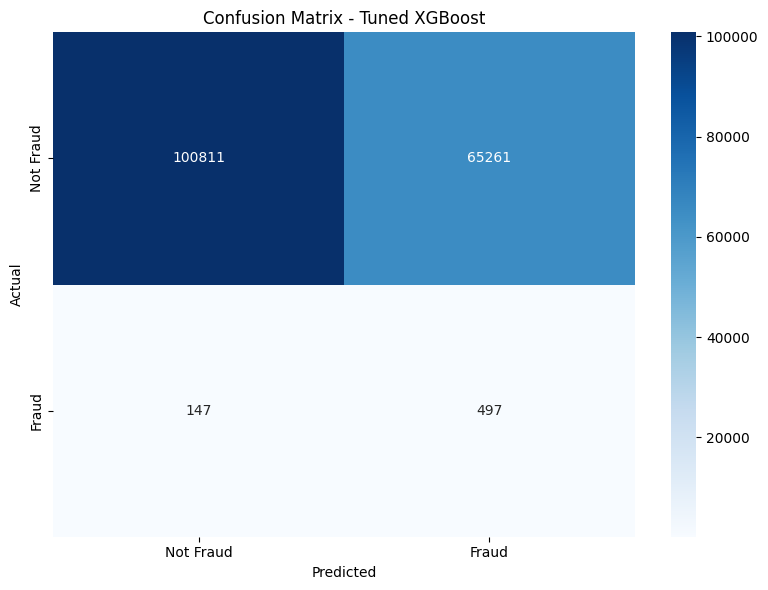

In [198]:
# =========================
# XGBOOST TUNED MODEL
# =========================

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,recall_score,f1_score


# ✅ Best parameters you found
xgb_tuned = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=400,
    random_state=42,
    # reg_alpha= 15,            # L1 regularization
    # reg_lambda= 15,           # L2 regularization
    scale_pos_weight=275,   # Handle class imbalance
    eval_metric='aucpr',                 # aucpr works well for imbalanced data
    n_jobs=-1,                           # Use all available CPU cores
    verbosity=1
)

# Train the tuned model
xgb_tuned.fit(X_train, y_train)



# ADD THIS - Optimize threshold for better precision
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Try different thresholds to find one with acceptable precision
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"Threshold: {threshold:.1f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

# Predictions
y_pred_tuned = xgb_tuned.predict(X_test)

# =========================
# PERFORMANCE METRICS
# =========================
print("\n=== Best Tuned XGBoost Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# =========================
# CONFUSION MATRIX
# =========================
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.tight_layout()
plt.show()


In [199]:
print(xgb_tuned.feature_importances_)

[0.08278315 0.05669333 0.05179957 0.04148462 0.11577755 0.02232246
 0.1655107  0.06920674 0.05029259 0.03990376 0.05551699 0.09429399
 0.05414626 0.04517937 0.05508893]


In [200]:
import pandas as pd

# Assuming your training features are in a DataFrame called X_train
feature_names = X_train.columns.tolist()  # or list of your feature names

# Create importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_tuned.feature_importances_
})

# Sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                               feature  importance
6         category_bin_Shopping & Misc           0
4              category_bin_Essentials           0
11                     age_group_31-45           0
0                             gender_M           0
7             city_category_Metro City           0
1                      region_Northern           0
10            city_category_Small Town           0
14                       age_group_76+           0
12                     age_group_46-60           0
2                      region_Southern           0
8             city_category_Micro Town           0
13                     age_group_61-75           0
3                       region_Western           0
9               city_category_Mid City           0
5   category_bin_Lifestyle & Wellbeing           0


In [201]:
# decile and ks Metrices

In [202]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Get prediction probabilities for fraud (class 1)
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# =========================
# DECTILE ANALYSIS
# =========================
def decile_analysis(y_true, y_proba):
    df = pd.DataFrame({"y_true": y_true, "y_proba": y_proba})
    df["decile"] = pd.qcut(df["y_proba"], 10, labels=False, duplicates="drop") + 1  # 1=lowest, 10=highest
    decile_summary = df.groupby("decile").agg(
        total=("y_true", "count"),
        events=("y_true", "sum"),
        non_events=("y_true", lambda x: (x == 0).sum())
    ).reset_index()
    decile_summary["event_rate"] = decile_summary["events"] / decile_summary["total"]
    return decile_summary.sort_values(by="decile", ascending=False)

deciles = decile_analysis(y_test, y_proba)
print("\n=== Decile Analysis ===")
print(deciles)

# =========================
# KS STATISTIC
# =========================
def ks_statistic(y_true, y_proba):
    df = pd.DataFrame({"y_true": y_true, "y_proba": y_proba})
    df = df.sort_values(by="y_proba", ascending=False)
    
    df["cum_event_rate"] = (df["y_true"].cumsum()) / df["y_true"].sum()
    df["cum_non_event_rate"] = ((1 - df["y_true"]).cumsum()) / (1 - df["y_true"]).sum()
    
    df["ks"] = df["cum_event_rate"] - df["cum_non_event_rate"]
    ks_value = df["ks"].max()
    return ks_value

ks_value = ks_statistic(y_test, y_proba)
print(f"\n=== KS Statistic ===\nKS Value: {ks_value:.4f}")

# =========================
# OPTIONAL: ROC AUC
# =========================
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.4f}")



=== Decile Analysis ===
   decile  total  events  non_events  event_rate
9      10  16320     211       16109           0
8       9  16903     130       16773           0
7       8  16473      89       16384           0
6       7  16283      67       16216           0
5       6  17282      41       17241           0
4       5  15939      57       15882           0
3       4  17498      25       17473           0
2       3  16594      19       16575           0
1       2  16702       3       16699           0
0       1  16722       2       16720           0

=== KS Statistic ===
KS Value: 0.3856
ROC AUC: 0.7594


In [203]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Get prediction probabilities for both train and test data
y_proba_train = xgb_tuned.predict_proba(X_train)[:, 1]  # Training data probabilities
y_proba_test = xgb_tuned.predict_proba(X_test)[:, 1]    # Test data probabilities

# =========================
# DECILE ANALYSIS WITH KS CALCULATION FUNCTION
# =========================
def decile_analysis_with_ks(y_true, y_proba, dataset_name=""):
    """
    Perform decile analysis and calculate KS statistic
    """
    # Create dataframe with actual values and probabilities
    df = pd.DataFrame({
        "y_true": y_true, 
        "y_proba": y_proba
    })
    
    # Create deciles (1=lowest probability, 10=highest probability)
    df["decile"] = pd.qcut(df["y_proba"], 10, labels=False, duplicates="drop") + 1
    
    # Group by decile and calculate basic metrics
    decile_summary = df.groupby("decile").agg({
        "y_true": ["count", "sum"]
    }).reset_index()
    
    # Flatten column names
    decile_summary.columns = ["decile", "total_data_points", "events"]
    decile_summary["non_events"] = decile_summary["total_data_points"] - decile_summary["events"]
    decile_summary["event_rate"] = decile_summary["events"] / decile_summary["total_data_points"]
    
    # Sort by decile in descending order (highest probability first)
    decile_summary = decile_summary.sort_values("decile", ascending=False).reset_index(drop=True)
    
    # Calculate cumulative values
    decile_summary["cum_events"] = decile_summary["events"].cumsum()
    decile_summary["cum_non_events"] = decile_summary["non_events"].cumsum()
    
    # Calculate total events and non-events
    total_events = decile_summary["events"].sum()
    total_non_events = decile_summary["non_events"].sum()
    
    # Calculate cumulative percentages (rates)
    decile_summary["cum_event_rate"] = (decile_summary["cum_events"] / total_events) * 100
    decile_summary["cum_non_event_rate"] = (decile_summary["cum_non_events"] / total_non_events) * 100
    
    # Calculate KS statistic for each decile (difference between cumulative rates)
    decile_summary["ks"] = decile_summary["cum_event_rate"] - decile_summary["cum_non_event_rate"]
    
    # Round for better display
    decile_summary["event_rate"] = decile_summary["event_rate"].round(4)
    decile_summary["cum_event_rate"] = decile_summary["cum_event_rate"].round(2)
    decile_summary["cum_non_event_rate"] = decile_summary["cum_non_event_rate"].round(2)
    decile_summary["ks"] = decile_summary["ks"].round(4)
    
    return decile_summary

def print_decile_table(deciles, dataset_name):
    """
    Print formatted decile analysis table
    """
    print(f"\n=== {dataset_name.upper()} DATA - DECILE ANALYSIS ===")
    print("=" * 102)
    print(f"{'Decile':<8}{'# Data Points':<15}{'# Events':<12}{'# Non-Events':<15}{'Event Rate':<12}{'Cum Events%':<13}{'Cum Non-Events%':<17}{'KS':<10}")
    print("-" * 102)
    
    for _, row in deciles.iterrows():
        print(f"{int(row['decile']):<8}"
              f"{int(row['total_data_points']):<15}"
              f"{int(row['events']):<12}"
              f"{int(row['non_events']):<15}"
              f"{row['event_rate']:<12.4f}"
              f"{row['cum_event_rate']:<13.2f}"
              f"{row['cum_non_event_rate']:<17.2f}"
              f"{row['ks']:<10.4f}")

# =========================
# TRAINING DATA ANALYSIS
# =========================
print("🔥 TRAINING DATA ANALYSIS")
print("=" * 50)

deciles_train = decile_analysis_with_ks(y_train, y_proba_train, "Training")
print_decile_table(deciles_train, "TRAINING")

# Training KS Summary
max_ks_train = deciles_train["ks"].max()
max_ks_decile_train = deciles_train.loc[deciles_train["ks"].idxmax(), "decile"]
auc_train = roc_auc_score(y_train, y_proba_train)

print(f"\n=== TRAINING DATA KS SUMMARY ===")
print(f"Maximum KS Value: {max_ks_train:.4f}")
print(f"KS achieved at Decile: {int(max_ks_decile_train)}")
print(f"ROC AUC: {auc_train:.4f}")

# =========================
# TEST DATA ANALYSIS
# =========================
print("\n\n🔥 TEST DATA ANALYSIS")
print("=" * 50)

deciles_test = decile_analysis_with_ks(y_test, y_proba_test, "Test")
print_decile_table(deciles_test, "TEST")

# Test KS Summary
max_ks_test = deciles_test["ks"].max()
max_ks_decile_test = deciles_test.loc[deciles_test["ks"].idxmax(), "decile"]
auc_test = roc_auc_score(y_test, y_proba_test)

print(f"\n=== TEST DATA KS SUMMARY ===")
print(f"Maximum KS Value: {max_ks_test:.4f}")
print(f"KS achieved at Decile: {int(max_ks_decile_test)}")
print(f"ROC AUC: {auc_test:.4f}")

# =========================
# COMPARATIVE ANALYSIS
# =========================
print(f"\n\n🔥 COMPARATIVE ANALYSIS")
print("=" * 50)
print(f"{'Metric':<25}{'Training':<15}{'Test':<15}{'Difference':<15}")
print("-" * 70)
print(f"{'Max KS Statistic':<25}{max_ks_train:<15.4f}{max_ks_test:<15.4f}{(max_ks_train-max_ks_test):<15.4f}")
print(f"{'ROC AUC':<25}{auc_train:<15.4f}{auc_test:<15.4f}{(auc_train-auc_test):<15.4f}")
print(f"{'KS Decile':<25}{int(max_ks_decile_train):<15}{int(max_ks_decile_test):<15}{'':<15}")

# =========================
# MODEL STABILITY ASSESSMENT
# =========================
print(f"\n=== MODEL STABILITY ASSESSMENT ===")

ks_difference = abs(max_ks_train - max_ks_test)
auc_difference = abs(auc_train - auc_test)

print(f"KS Difference (Train vs Test): {ks_difference:.4f}")
print(f"AUC Difference (Train vs Test): {auc_difference:.4f}")




# =========================
# PERFORMANCE INTERPRETATION
# =========================
print(f"\n=== PERFORMANCE INTERPRETATION ===")

def interpret_ks(ks_value):
    if ks_value > 0.4:
        return "Excellent"
    elif ks_value > 0.3:
        return "Good"
    elif ks_value > 0.2:
        return "Acceptable"
    else:
        return "Poor"

print(f"Training Performance: KS={max_ks_train:.4f} ({interpret_ks(max_ks_train)})")
print(f"Test Performance: KS={max_ks_test:.4f} ({interpret_ks(max_ks_test)})")


# =========================
# OPTIONAL: SAVE TO CSV
# =========================
# Save both analyses to CSV files
deciles_train_export = deciles_train.copy()
deciles_train_export['dataset'] = 'train'
deciles_test_export = deciles_test.copy()
deciles_test_export['dataset'] = 'test'

combined_analysis = pd.concat([deciles_train_export, deciles_test_export], ignore_index=True)

# Uncomment to save results
deciles_train.to_csv('decile_analysis_train.csv', index=False)
deciles_test.to_csv('decile_analysis_test.csv', index=False)
combined_analysis.to_csv('decile_analysis_combined.csv', index=False)
print(f"\n📁 Results saved to CSV files")

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE ✅")
print(f"="*80)

🔥 TRAINING DATA ANALYSIS

=== TRAINING DATA - DECILE ANALYSIS ===
Decile  # Data Points  # Events    # Non-Events   Event Rate  Cum Events%  Cum Non-Events%  KS        
------------------------------------------------------------------------------------------------------
10      38149          562         37587          0.0147      37.44        9.70             27.7419   
9       39638          290         39348          0.0073      56.76        19.85            36.9081   
8       38055          209         37846          0.0055      70.69        29.62            41.0655   
7       37976          161         37815          0.0042      81.41        39.38            42.0330   
6       40102          118         39984          0.0029      89.27        49.70            39.5760   
5       36980          87          36893          0.0024      95.07        59.22            35.8514   
4       41201          60          41141          0.0015      99.07        69.84            29.2318   
3      

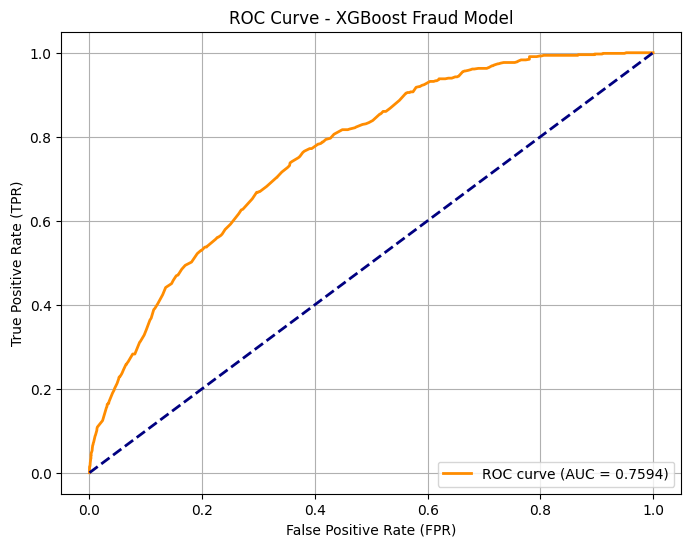

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (fraud = 1)
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# =========================
# PLOT ROC CURVE
# =========================
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - XGBoost Fraud Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [205]:
from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, y_proba)
print(f'PR AUC: {pr_auc:.3f}')
print(f'Baseline (random): {y_test.mean():.4f}')

PR AUC: 0.025
Baseline (random): 0.0039


In [206]:
# LIGHT GBM

In [207]:
# tuning